In [2]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [3]:
n_sensors=16

In [4]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [5]:
t = np.linspace(0, 1, 41)

In [6]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [7]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [8]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [9]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [10]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1.shape

(41, 4, 4)

In [12]:
sensor1 = sensor1.reshape(41, 16, 1)

In [13]:
sensor1.shape

(41, 16, 1)

In [14]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [15]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [16]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [17]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 5)                10        
 se)                                                             
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 secondHiddenLayerSensor (De  (None, 5)                30        
 nse)                                                            
                                                             

In [20]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [21]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 10ms/step - loss: 0.7493 - rmse: 0.8582
Epoch 2/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7485 - rmse: 0.8578
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7482 - rmse: 0.8576
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7423 - rmse: 0.8542
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7422 - rmse: 0.8542
Epoch 6/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7395 - rmse: 0.8525
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7406 - rmse: 0.8532
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7396 - rmse: 0.8526
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7399 - rmse: 0.8528
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7388 - rmse: 0.8522
Epoch 11/10000
2/2 [============================

2/2 [==============================] - 0s 6ms/step - loss: 0.6432 - rmse: 0.7944
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6413 - rmse: 0.7932
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6393 - rmse: 0.7919
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6394 - rmse: 0.7920
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6380 - rmse: 0.7911
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6387 - rmse: 0.7915
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6376 - rmse: 0.7908
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6332 - rmse: 0.7881
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6324 - rmse: 0.7876
Epoch 95/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6313 - rmse: 0.7869
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.5165 - rmse: 0.7104
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5133 - rmse: 0.7082
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5125 - rmse: 0.7076
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5138 - rmse: 0.7086
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5089 - rmse: 0.7051
Epoch 175/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5096 - rmse: 0.7056
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5073 - rmse: 0.7040
Epoch 177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5088 - rmse: 0.7050
Epoch 178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5093 - rmse: 0.7054
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5070 - rmse: 0.7038
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.4469 - rmse: 0.6600
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4469 - rmse: 0.6600
Epoch 256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4490 - rmse: 0.6616
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4451 - rmse: 0.6586
Epoch 258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4446 - rmse: 0.6583
Epoch 259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4430 - rmse: 0.6570
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4432 - rmse: 0.6572
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4456 - rmse: 0.6590
Epoch 262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4420 - rmse: 0.6563
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4442 - rmse: 0.6580
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 0.3744 - rmse: 0.6028
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3737 - rmse: 0.6023
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3791 - rmse: 0.6067
Epoch 341/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3733 - rmse: 0.6019
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3732 - rmse: 0.6019
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3766 - rmse: 0.6047
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3741 - rmse: 0.6026
Epoch 345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3709 - rmse: 0.6000
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3716 - rmse: 0.6005
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3718 - rmse: 0.6007
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.3301 - rmse: 0.5652
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3303 - rmse: 0.5654
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3272 - rmse: 0.5627
Epoch 425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3323 - rmse: 0.5672
Epoch 426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3264 - rmse: 0.5620
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3263 - rmse: 0.5619
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3276 - rmse: 0.5630
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3276 - rmse: 0.5631
Epoch 430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3263 - rmse: 0.5618
Epoch 431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3257 - rmse: 0.5614
Epoch 432/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.2914 - rmse: 0.5302
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2908 - rmse: 0.5296
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2885 - rmse: 0.5275
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2910 - rmse: 0.5298
Epoch 510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2886 - rmse: 0.5276
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2884 - rmse: 0.5274
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2883 - rmse: 0.5273
Epoch 513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2872 - rmse: 0.5262
Epoch 514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2877 - rmse: 0.5267
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2870 - rmse: 0.5261
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.2562 - rmse: 0.4962
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2538 - rmse: 0.4938
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2535 - rmse: 0.4935
Epoch 593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2526 - rmse: 0.4926
Epoch 594/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2503 - rmse: 0.4903
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2547 - rmse: 0.4947
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2550 - rmse: 0.4950
Epoch 597/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2531 - rmse: 0.4931
Epoch 598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2511 - rmse: 0.4910
Epoch 599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2522 - rmse: 0.4922
Epoch 600/10000
2/2 [====================

2/2 [==============================] - 0s 12ms/step - loss: 0.2242 - rmse: 0.4631
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2198 - rmse: 0.4584
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2218 - rmse: 0.4606
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2217 - rmse: 0.4605
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2206 - rmse: 0.4593
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2193 - rmse: 0.4578
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2169 - rmse: 0.4553
Epoch 681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2177 - rmse: 0.4561
Epoch 682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2215 - rmse: 0.4603
Epoch 683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2191 - rmse: 0.4576
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 7ms/step - loss: 0.1933 - rmse: 0.4289
Epoch 759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1939 - rmse: 0.4296
Epoch 760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1967 - rmse: 0.4329
Epoch 761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1936 - rmse: 0.4292
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1922 - rmse: 0.4275
Epoch 763/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1939 - rmse: 0.4295
Epoch 764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1936 - rmse: 0.4292
Epoch 765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1924 - rmse: 0.4279
Epoch 766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1933 - rmse: 0.4289
Epoch 767/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1928 - rmse: 0.4283
Epoch 768/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.1729 - rmse: 0.4048
Epoch 843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1745 - rmse: 0.4067
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1737 - rmse: 0.4058
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1687 - rmse: 0.3995
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1717 - rmse: 0.4033
Epoch 847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1709 - rmse: 0.4023
Epoch 848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1739 - rmse: 0.4060
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1674 - rmse: 0.3979
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1692 - rmse: 0.4002
Epoch 851/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1671 - rmse: 0.3976
Epoch 852/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 0.1497 - rmse: 0.3753
Epoch 927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1542 - rmse: 0.3813
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1490 - rmse: 0.3744
Epoch 929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1537 - rmse: 0.3807
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1540 - rmse: 0.3810
Epoch 931/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1546 - rmse: 0.3818
Epoch 932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1511 - rmse: 0.3772
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1514 - rmse: 0.3776
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1503 - rmse: 0.3762
Epoch 935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1510 - rmse: 0.3771
Epoch 936/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.1378 - rmse: 0.3595
Epoch 1011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1334 - rmse: 0.3534
Epoch 1012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1369 - rmse: 0.3582
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1330 - rmse: 0.3528
Epoch 1014/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1378 - rmse: 0.3596
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1321 - rmse: 0.3515
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1338 - rmse: 0.3539
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1339 - rmse: 0.3541
Epoch 1018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1328 - rmse: 0.3526
Epoch 1019/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1330 - rmse: 0.3528
Epoch 1020/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.1196 - rmse: 0.3337
Epoch 1094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1195 - rmse: 0.3334
Epoch 1095/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1222 - rmse: 0.3375
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1184 - rmse: 0.3318
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1194 - rmse: 0.3333
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1202 - rmse: 0.3345
Epoch 1099/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1193 - rmse: 0.3332
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1213 - rmse: 0.3362
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1180 - rmse: 0.3312
Epoch 1102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1181 - rmse: 0.3314
Epoch 1103/10000
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.1069 - rmse: 0.3144
Epoch 1177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1063 - rmse: 0.3134
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1067 - rmse: 0.3141
Epoch 1179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1057 - rmse: 0.3125
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1064 - rmse: 0.3136
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1062 - rmse: 0.3134
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1056 - rmse: 0.3124
Epoch 1183/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1058 - rmse: 0.3127
Epoch 1184/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1067 - rmse: 0.3141
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1038 - rmse: 0.3095
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0936 - rmse: 0.2928
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0931 - rmse: 0.2919
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0943 - rmse: 0.2941
Epoch 1262/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1000 - rmse: 0.3036
Epoch 1263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0997 - rmse: 0.3031
Epoch 1264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0943 - rmse: 0.2941
Epoch 1265/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0941 - rmse: 0.2937
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0919 - rmse: 0.2899
Epoch 1267/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0923 - rmse: 0.2907
Epoch 1268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0943 - rmse: 0.2941
Epoch 1269/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0831 - rmse: 0.2747
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0846 - rmse: 0.2776
Epoch 1344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0842 - rmse: 0.2768
Epoch 1345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0854 - rmse: 0.2789
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0845 - rmse: 0.2773
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0865 - rmse: 0.2810
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0842 - rmse: 0.2768
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0879 - rmse: 0.2834
Epoch 1350/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0830 - rmse: 0.2746
Epoch 1351/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0836 - rmse: 0.2758
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0738 - rmse: 0.2577
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0744 - rmse: 0.2589
Epoch 1427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0732 - rmse: 0.2565
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0734 - rmse: 0.2570
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0743 - rmse: 0.2587
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0728 - rmse: 0.2557
Epoch 1431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0734 - rmse: 0.2569
Epoch 1432/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0738 - rmse: 0.2577
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0751 - rmse: 0.2603
Epoch 1434/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0729 - rmse: 0.2560
Epoch 1435/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0643 - rmse: 0.2391
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0651 - rmse: 0.2408
Epoch 1510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0666 - rmse: 0.2438
Epoch 1511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0654 - rmse: 0.2414
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0655 - rmse: 0.2415
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0647 - rmse: 0.2398
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0654 - rmse: 0.2413
Epoch 1515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0636 - rmse: 0.2377
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0702 - rmse: 0.2511
Epoch 1517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0663 - rmse: 0.2433
Epoch 1518/10000
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.0574 - rmse: 0.2245
Epoch 1592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0586 - rmse: 0.2272
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0588 - rmse: 0.2277
Epoch 1594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0587 - rmse: 0.2274
Epoch 1595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0573 - rmse: 0.2243
Epoch 1596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0573 - rmse: 0.2245
Epoch 1597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0584 - rmse: 0.2269
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0618 - rmse: 0.2343
Epoch 1599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0581 - rmse: 0.2262
Epoch 1600/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0624 - rmse: 0.2355
Epoch 1601/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0522 - rmse: 0.2132
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0516 - rmse: 0.2119
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0508 - rmse: 0.2100
Epoch 1677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0507 - rmse: 0.2097
Epoch 1678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0504 - rmse: 0.2089
Epoch 1679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0511 - rmse: 0.2107
Epoch 1680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0505 - rmse: 0.2092
Epoch 1681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0518 - rmse: 0.2124
Epoch 1682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0508 - rmse: 0.2098
Epoch 1683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0497 - rmse: 0.2072
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0493 - rmse: 0.2068
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0456 - rmse: 0.1975
Epoch 1759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0450 - rmse: 0.1961
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0440 - rmse: 0.1935
Epoch 1761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0451 - rmse: 0.1964
Epoch 1762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0450 - rmse: 0.1962
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0476 - rmse: 0.2027
Epoch 1764/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0456 - rmse: 0.1977
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0451 - rmse: 0.1963
Epoch 1766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0468 - rmse: 0.2008
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0382 - rmse: 0.1784
Epoch 1841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0392 - rmse: 0.1813
Epoch 1842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0393 - rmse: 0.1815
Epoch 1843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0399 - rmse: 0.1831
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0384 - rmse: 0.1791
Epoch 1845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0380 - rmse: 0.1780
Epoch 1846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0390 - rmse: 0.1808
Epoch 1847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0411 - rmse: 0.1864
Epoch 1848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0392 - rmse: 0.1813
Epoch 1849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0391 - rmse: 0.1811
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0342 - rmse: 0.1676
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0342 - rmse: 0.1674
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0330 - rmse: 0.1639
Epoch 1926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0330 - rmse: 0.1639
Epoch 1927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0315 - rmse: 0.1591
Epoch 1928/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0323 - rmse: 0.1617
Epoch 1929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0328 - rmse: 0.1632
Epoch 1930/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0318 - rmse: 0.1601
Epoch 1931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0316 - rmse: 0.1597
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0321 - rmse: 0.1611
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0263 - rmse: 0.1428
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - rmse: 0.1535
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0255 - rmse: 0.1398
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0266 - rmse: 0.1436
Epoch 2010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0262 - rmse: 0.1421
Epoch 2011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0271 - rmse: 0.1454
Epoch 2012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0256 - rmse: 0.1400
Epoch 2013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0262 - rmse: 0.1424
Epoch 2014/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0263 - rmse: 0.1425
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0265 - rmse: 0.1434
Epoch 2016/10000
2/2 [=========

2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - rmse: 0.1206
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0205 - rmse: 0.1213
Epoch 2091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0241 - rmse: 0.1353
Epoch 2092/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0217 - rmse: 0.1262
Epoch 2093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0202 - rmse: 0.1200
Epoch 2094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0233 - rmse: 0.1325
Epoch 2095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0208 - rmse: 0.1226
Epoch 2096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0212 - rmse: 0.1242
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0201 - rmse: 0.1198
Epoch 2098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0215 - rmse: 0.1253
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0175 - rmse: 0.1092
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.1121
Epoch 2174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0172 - rmse: 0.1076
Epoch 2175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0173 - rmse: 0.1083
Epoch 2176/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0168 - rmse: 0.1058
Epoch 2177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0174 - rmse: 0.1085
Epoch 2178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0176 - rmse: 0.1097
Epoch 2179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0172 - rmse: 0.1076
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0181 - rmse: 0.1117
Epoch 2181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0214 - rmse: 0.1255
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.0953
Epoch 2256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0142 - rmse: 0.0937
Epoch 2257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.0977
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0190 - rmse: 0.1163
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0188 - rmse: 0.1154
Epoch 2260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0155 - rmse: 0.1003
Epoch 2261/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0142 - rmse: 0.0934
Epoch 2262/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0155 - rmse: 0.1001
Epoch 2263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0152 - rmse: 0.0987
Epoch 2264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0142 - rmse: 0.0936
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0123 - rmse: 0.0837
Epoch 2339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.0830
Epoch 2340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.0899
Epoch 2341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.0869
Epoch 2342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0165 - rmse: 0.1060
Epoch 2343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0125 - rmse: 0.0847
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0126 - rmse: 0.0856
Epoch 2345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0827
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.0897
Epoch 2347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.0893
Epoch 2348/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.0768
Epoch 2422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0762
Epoch 2423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0112 - rmse: 0.0777
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0760
Epoch 2425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.0764
Epoch 2426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.0741
Epoch 2427/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.0794
Epoch 2428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0114 - rmse: 0.0793
Epoch 2429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0114 - rmse: 0.0792
Epoch 2430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - rmse: 0.0734
Epoch 2431/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.0729
Epoch 2505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0715
Epoch 2506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0136 - rmse: 0.0926
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0713
Epoch 2508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0740
Epoch 2509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - rmse: 0.0740
Epoch 2510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0673
Epoch 2511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.0807
Epoch 2512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0721
Epoch 2513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0676
Epoch 2514/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0606
Epoch 2588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0591
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0655
Epoch 2590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0608
Epoch 2591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0639
Epoch 2592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - rmse: 0.0847
Epoch 2593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0619
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0567
Epoch 2595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0573
Epoch 2596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0572
Epoch 2597/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0510
Epoch 2671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0548
Epoch 2672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0562
Epoch 2673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0520
Epoch 2674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0506
Epoch 2675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0498
Epoch 2676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0530
Epoch 2677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0545
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0543
Epoch 2679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0566
Epoch 2680/10000
2/2 [===========

2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0544
Epoch 2754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0533
Epoch 2755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0704
Epoch 2756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0475
Epoch 2757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0503
Epoch 2758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0526
Epoch 2759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0546
Epoch 2760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0467
Epoch 2761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0763
Epoch 2762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0550
Epoch 2763/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0413
Epoch 2837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0468
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0458
Epoch 2839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0410
Epoch 2840/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0520
Epoch 2841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0509
Epoch 2842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0425
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0605
Epoch 2844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0478
Epoch 2845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0512
Epoch 2846/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0445
Epoch 2920/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0390
Epoch 2921/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0482
Epoch 2922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0435
Epoch 2923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0373
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0409
Epoch 2925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0482
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0371
Epoch 2927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0421
Epoch 2928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0481
Epoch 2929/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0346
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0432
Epoch 3004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0592
Epoch 3005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0351
Epoch 3006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0431
Epoch 3007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0383
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0373
Epoch 3009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0328
Epoch 3010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0425
Epoch 3011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0323
Epoch 3012/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0294
Epoch 3086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0326
Epoch 3087/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0320
Epoch 3088/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0531
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0436
Epoch 3090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0318
Epoch 3091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0318
Epoch 3092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0495
Epoch 3093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0291
Epoch 3094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 3095/10000
2/2 [===========

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0473
Epoch 3169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0337
Epoch 3170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0283
Epoch 3171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0313
Epoch 3172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0408
Epoch 3173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0293
Epoch 3174/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0381
Epoch 3175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0272
Epoch 3176/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0262
Epoch 3177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0472
Epoch 3178/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0454
Epoch 3252/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0332
Epoch 3253/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0393
Epoch 3254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0402
Epoch 3255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0371
Epoch 3256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0333
Epoch 3257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0238
Epoch 3258/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0295
Epoch 3259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0390
Epoch 3260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0499
Epoch 3261/10000
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0337
Epoch 3335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0304
Epoch 3336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0358
Epoch 3337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0376
Epoch 3338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0225
Epoch 3339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0289
Epoch 3340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0241
Epoch 3341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0357
Epoch 3342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0225
Epoch 3343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0271
Epoch 3344/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0374
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0293
Epoch 3419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0355
Epoch 3420/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0326
Epoch 3421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0229
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0346
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0199
Epoch 3424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0222
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0336
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0302
Epoch 3427/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0347
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0258
Epoch 3502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0367
Epoch 3503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0237
Epoch 3504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0207
Epoch 3505/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0199
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0204
Epoch 3507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0536
Epoch 3508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0367
Epoch 3509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0199
Epoch 3510/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0331
Epoch 3584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0262
Epoch 3585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0242
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0554
Epoch 3587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0166
Epoch 3588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0207
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0359
Epoch 3590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0224
Epoch 3591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0333
Epoch 3592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0282
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0164
Epoch 3667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0367
Epoch 3668/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0532
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0282
Epoch 3670/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0281
Epoch 3671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0532
Epoch 3672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0531
Epoch 3673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0360
Epoch 3674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0336
Epoch 3675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0161
Epoch 3676/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0229
Epoch 3750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0229
Epoch 3751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0258
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0275
Epoch 3753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0489
Epoch 3754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0238
Epoch 3755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0251
Epoch 3756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0288
Epoch 3757/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0225
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0262
Epoch 3759/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0511
Epoch 3833/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0209
Epoch 3834/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0478
Epoch 3835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0347
Epoch 3836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0142
Epoch 3837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0280
Epoch 3838/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0257
Epoch 3839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0358
Epoch 3840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0346
Epoch 3841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0510
Epoch 3842/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0169
Epoch 3916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0232
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0343
Epoch 3918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0405
Epoch 3919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0361
Epoch 3920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0293
Epoch 3922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0329
Epoch 3923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0306
Epoch 3924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0282
Epoch 3925/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0199
Epoch 3999/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0136
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0152
Epoch 4001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0500
Epoch 4002/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0133
Epoch 4003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0164
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0187
Epoch 4005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0138
Epoch 4006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0138
Epoch 4007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0223
Epoch 4008/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0494
Epoch 4082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0316
Epoch 4083/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0278
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0223
Epoch 4085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0238
Epoch 4086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0302
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0276
Epoch 4088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0185
Epoch 4089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0156
Epoch 4090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0131
Epoch 4165/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0238
Epoch 4166/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0202
Epoch 4167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0251
Epoch 4168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0338
Epoch 4169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0212
Epoch 4170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0155
Epoch 4171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0144
Epoch 4172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0224
Epoch 4173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0222
Epoch 4174/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0132
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0242
Epoch 4249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0327
Epoch 4250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0301
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0286
Epoch 4252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0248
Epoch 4253/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0154
Epoch 4254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 4255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0134
Epoch 4256/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0311
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0460
Epoch 4331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0156
Epoch 4332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0300
Epoch 4333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0219
Epoch 4334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0246
Epoch 4335/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0205
Epoch 4336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0198
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0336
Epoch 4338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0128
Epoch 4339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0145
Epoch 4340/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0335
Epoch 4414/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0241
Epoch 4415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0247
Epoch 4416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0425
Epoch 4417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0310
Epoch 4418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0129
Epoch 4419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0335
Epoch 4420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0240
Epoch 4421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0311
Epoch 4422/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0285
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0284
Epoch 4497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0310
Epoch 4498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0322
Epoch 4499/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0394
Epoch 4500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0334
Epoch 4501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0208
Epoch 4502/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0309
Epoch 4503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0133
Epoch 4504/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0207
Epoch 4505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0180
Epoch 4506/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0146
Epoch 4580/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0221
Epoch 4581/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0218
Epoch 4582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0145
Epoch 4583/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0218
Epoch 4584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0261
Epoch 4585/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 4586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0218
Epoch 4587/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0217
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0238
Epoch 4589/10000
2/2 [===========

2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0271
Epoch 4663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0457
Epoch 4664/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0285
Epoch 4665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0217
Epoch 4666/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0154
Epoch 4667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0309
Epoch 4668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0197
Epoch 4669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0131
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0393
Epoch 4671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0348
Epoch 4672/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0141
Epoch 4746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0113
Epoch 4747/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0502
Epoch 4748/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0143
Epoch 4749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0144
Epoch 4750/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0289
Epoch 4751/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0261
Epoch 4752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0499
Epoch 4753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0337
Epoch 4754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0134
Epoch 4755/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0191
Epoch 4829/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0296
Epoch 4830/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0501
Epoch 4831/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0256
Epoch 4832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0132
Epoch 4833/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0245
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0310
Epoch 4835/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0324
Epoch 4836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0141
Epoch 4837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0214
Epoch 4838/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0263
Epoch 4912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0164
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0164
Epoch 4914/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0185
Epoch 4915/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0301
Epoch 4916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0198
Epoch 4917/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0508
Epoch 4918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0183
Epoch 4919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0339
Epoch 4920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0149
Epoch 4921/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0242
Epoch 4995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0229
Epoch 4996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0216
Epoch 4997/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0320
Epoch 4998/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0236
Epoch 4999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0124
Epoch 5000/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0202
Epoch 5001/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0307
Epoch 5002/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0283
Epoch 5003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0228
Epoch 5004/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0174
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0320
Epoch 5079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0122
Epoch 5080/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0462
Epoch 5081/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0202
Epoch 5082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0138
Epoch 5083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0268
Epoch 5084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0284
Epoch 5085/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0296
Epoch 5086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0119
Epoch 5087/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0154
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0424
Epoch 5162/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0231
Epoch 5163/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0311
Epoch 5164/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0202
Epoch 5165/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0215
Epoch 5166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0193
Epoch 5167/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0320
Epoch 5168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0343
Epoch 5169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0334
Epoch 5170/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0285
Epoch 5244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0216
Epoch 5245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0274
Epoch 5246/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0338
Epoch 5247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0285
Epoch 5248/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0138
Epoch 5249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0220
Epoch 5250/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0283
Epoch 5251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0422
Epoch 5252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0243
Epoch 5253/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0219
Epoch 5327/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0199
Epoch 5328/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0325
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0394
Epoch 5330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0209
Epoch 5331/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0286
Epoch 5332/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0506
Epoch 5333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0196
Epoch 5334/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0235
Epoch 5335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0336
Epoch 5336/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0223
Epoch 5410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0152
Epoch 5411/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 5412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0197
Epoch 5413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0242
Epoch 5414/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0340
Epoch 5415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0201
Epoch 5416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0141
Epoch 5417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0128
Epoch 5418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0198
Epoch 5419/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0317
Epoch 5493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0279
Epoch 5494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0420
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0280
Epoch 5496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0420
Epoch 5497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0239
Epoch 5498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0116
Epoch 5499/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0169
Epoch 5500/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0213
Epoch 5501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0342
Epoch 5502/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0213
Epoch 5576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0490
Epoch 5577/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0145
Epoch 5578/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0136
Epoch 5579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0232
Epoch 5580/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0198
Epoch 5581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0135
Epoch 5582/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0225
Epoch 5583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0211
Epoch 5584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0211
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0149
Epoch 5659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0228
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0142
Epoch 5661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0214
Epoch 5662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0334
Epoch 5663/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0200
Epoch 5664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0119
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0111
Epoch 5666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0213
Epoch 5667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0117
Epoch 5668/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0338
Epoch 5742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0118
Epoch 5743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0180
Epoch 5744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0326
Epoch 5745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0491
Epoch 5746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0228
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0221
Epoch 5748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0194
Epoch 5749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0180
Epoch 5750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0116
Epoch 5751/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0325
Epoch 5825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0233
Epoch 5826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0329
Epoch 5827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0114
Epoch 5828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0246
Epoch 5829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0097
Epoch 5830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0312
Epoch 5831/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0177
Epoch 5832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0161
Epoch 5833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0486
Epoch 5834/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0136
Epoch 5908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0092
Epoch 5909/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0313
Epoch 5910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0125
Epoch 5911/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0160
Epoch 5912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0100
Epoch 5913/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0417
Epoch 5914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0101
Epoch 5915/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0091
Epoch 5916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0450
Epoch 5917/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0385
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0200
Epoch 5992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0335
Epoch 5993/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0108
Epoch 5994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0328
Epoch 5995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0299
Epoch 5996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0417
Epoch 5997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0178
Epoch 5998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0451
Epoch 5999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0134
Epoch 6000/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0300
Epoch 6074/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0448
Epoch 6075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0274
Epoch 6076/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0231
Epoch 6077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0273
Epoch 6078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0108
Epoch 6079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0223
Epoch 6080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0273
Epoch 6081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0335
Epoch 6082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0201
Epoch 6083/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0242
Epoch 6157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0334
Epoch 6158/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0199
Epoch 6159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0170
Epoch 6160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0268
Epoch 6161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0083
Epoch 6162/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0449
Epoch 6163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0309
Epoch 6164/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0090
Epoch 6165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0321
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0448
Epoch 6240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0220
Epoch 6241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0079
Epoch 6242/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0243
Epoch 6243/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0113
Epoch 6244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0447
Epoch 6245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0101
Epoch 6246/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0196
Epoch 6247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0297
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0447
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0219
Epoch 6323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0320
Epoch 6324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0320
Epoch 6325/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0320
Epoch 6326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0413
Epoch 6327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0484
Epoch 6328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0332
Epoch 6329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0114
Epoch 6330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0381
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0195
Epoch 6332/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0073
Epoch 6406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0084
Epoch 6407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0225
Epoch 6408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0307
Epoch 6409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0239
Epoch 6410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0196
Epoch 6411/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0196
Epoch 6412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0196
Epoch 6413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0280
Epoch 6414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0324
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0254
Epoch 6489/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0333
Epoch 6490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0196
Epoch 6491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0121
Epoch 6492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0266
Epoch 6493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0107
Epoch 6494/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0324
Epoch 6495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0413
Epoch 6496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0173
Epoch 6497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0411
Epoch 6498/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0167
Epoch 6572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0084
Epoch 6573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0479
Epoch 6574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0211
Epoch 6575/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0415
Epoch 6576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0296
Epoch 6577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0323
Epoch 6578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0096
Epoch 6579/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0085
Epoch 6580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0254
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0270
Epoch 6655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0447
Epoch 6656/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0446
Epoch 6657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0478
Epoch 6658/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0198
Epoch 6659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0099
Epoch 6660/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0204
Epoch 6661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0223
Epoch 6662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0272
Epoch 6663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0335
Epoch 6664/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0179
Epoch 6738/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0445
Epoch 6739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0475
Epoch 6740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0070
Epoch 6741/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0293
Epoch 6742/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0210
Epoch 6743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0293
Epoch 6744/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0293
Epoch 6745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0253
Epoch 6746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0280
Epoch 6747/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 6822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0334
Epoch 6823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0297
Epoch 6824/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0086
Epoch 6825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 6826/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0128
Epoch 6827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0309
Epoch 6828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0080
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0197
Epoch 6830/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0208
Epoch 6904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0330
Epoch 6905/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0305
Epoch 6906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0065
Epoch 6907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0380
Epoch 6908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0266
Epoch 6909/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0193
Epoch 6910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0146
Epoch 6911/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0075
Epoch 6912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0410
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0167
Epoch 6987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0222
Epoch 6988/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0293
Epoch 6989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0166
Epoch 6990/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0293
Epoch 6991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0329
Epoch 6992/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0409
Epoch 6993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0089
Epoch 6994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0193
Epoch 6995/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0222
Epoch 6996/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0278
Epoch 7070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0193
Epoch 7071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0106
Epoch 7072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0214
Epoch 7073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0088
Epoch 7074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0379
Epoch 7075/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0291
Epoch 7076/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0379
Epoch 7077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0291
Epoch 7078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0177
Epoch 7079/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0083
Epoch 7153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0328
Epoch 7154/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 7155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0264
Epoch 7156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0205
Epoch 7157/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0190
Epoch 7158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0377
Epoch 7159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0249
Epoch 7160/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0264
Epoch 7161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0059
Epoch 7162/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0265
Epoch 7236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0062
Epoch 7237/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0278
Epoch 7238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0176
Epoch 7239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0473
Epoch 7240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0329
Epoch 7241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0317
Epoch 7242/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0089
Epoch 7243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0290
Epoch 7244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0062
Epoch 7245/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0143
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0220
Epoch 7320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0315
Epoch 7321/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 7322/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8083e-04 - rmse: 0.0066
Epoch 7323/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6376e-04 - rmse: 0.0051
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9955e-04 - rmse: 0.0079
Epoch 7325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0249
Epoch 7326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0234
Epoch 7327/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9984e-04 - rmse: 0.0080
Epoch 7328/10000

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0162
Epoch 7401/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0139
Epoch 7402/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4590e-04 - rmse: 0.0062
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0329
Epoch 7404/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0409
Epoch 7405/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0376
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0175
Epoch 7407/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4332e-04 - rmse: 0.0061
Epoch 7408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0235
Epoch 7409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0211
Epoch 7410/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 9.6378e-04 - rmse: 0.0093
Epoch 7483/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0318
Epoch 7484/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9806e-04 - rmse: 0.0110
Epoch 7485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0140
Epoch 7486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0376
Epoch 7487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0317
Epoch 7488/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4096e-04 - rmse: 0.0081
Epoch 7489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0189
Epoch 7490/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0189
Epoch 7491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0140
Epoch 7492/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0316
Epoch 7565/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8051e-04 - rmse: 0.0059
Epoch 7566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0277
Epoch 7567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0220
Epoch 7568/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0440
Epoch 7569/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8863e-04 - rmse: 0.0067
Epoch 7570/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0141
Epoch 7571/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6792e-04 - rmse: 0.0111
Epoch 7572/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0973e-04 - rmse: 0.0082
Epoch 7573/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0440
Epoch 7574/100

2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0214
Epoch 7647/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0208
Epoch 7648/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2511e-04 - rmse: 0.0105
Epoch 7649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0266
Epoch 7650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0321
Epoch 7651/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0177
Epoch 7652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0318
Epoch 7653/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0330
Epoch 7654/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5772e-04 - rmse: 0.0067
Epoch 7655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0329
Epoch 7656/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 8.7932e-04 - rmse: 0.0097
Epoch 7729/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0409
Epoch 7730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0329
Epoch 7731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0188
Epoch 7732/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0213
Epoch 7733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0263
Epoch 7734/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1748e-04 - rmse: 0.0059
Epoch 7735/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3076e-04 - rmse: 0.0069
Epoch 7736/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0235
Epoch 7737/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2632e-04 - rmse: 0.0067
Epoch 7738/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0163
Epoch 7811/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0047e-04 - rmse: 0.0068
Epoch 7812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0191
Epoch 7813/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6676e-04 - rmse: 0.0106
Epoch 7814/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6607e-04 - rmse: 0.0146
Epoch 7815/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8971e-04 - rmse: 0.0117
Epoch 7816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0224
Epoch 7817/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9263e-04 - rmse: 0.0063
Epoch 7818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0238
Epoch 7819/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0924e-04 - rmse: 0.0076
Epoch 7

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0378
Epoch 7892/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0267
Epoch 7893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0194
Epoch 7894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0170
Epoch 7895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0442
Epoch 7896/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0322
Epoch 7897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0168
Epoch 7898/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2419e-04 - rmse: 0.0100
Epoch 7899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0256
Epoch 7900/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2628e-04 - rmse: 0.0102
Epoch 7901/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 8.1926e-04 - rmse: 0.0111
Epoch 7974/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0253
Epoch 7975/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0280
Epoch 7976/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3893e-04 - rmse: 0.0065
Epoch 7977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0319
Epoch 7978/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7297e-04 - rmse: 0.0088
Epoch 7979/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7418e-04 - rmse: 0.0167
Epoch 7980/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.7205e-04 - rmse: 0.0167
Epoch 7981/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0189
Epoch 7982/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.0063e-04 - rmse: 0.0144
Epoch 7

2/2 [==============================] - 0s 12ms/step - loss: 7.9981e-04 - rmse: 0.0114
Epoch 8055/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9796e-04 - rmse: 0.0113
Epoch 8056/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0184
Epoch 8057/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3177e-04 - rmse: 0.0079
Epoch 8058/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6825e-04 - rmse: 0.0173
Epoch 8059/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8745e-04 - rmse: 0.0109
Epoch 8060/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0414
Epoch 8061/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0195
Epoch 8062/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9875e-04 - rmse: 0.0152
Epoch 8063/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0321
Epoch 

Epoch 8136/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0265
Epoch 8137/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0191
Epoch 8138/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0318
Epoch 8139/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3803e-04 - rmse: 0.0098
Epoch 8140/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9857e-04 - rmse: 0.0189
Epoch 8141/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0213
Epoch 8142/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0235
Epoch 8143/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0264
Epoch 8144/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0277
Epoch 8145/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9545e-04 - rmse: 0.0160
Ep

2/2 [==============================] - 0s 12ms/step - loss: 7.8604e-04 - rmse: 0.0130
Epoch 8218/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0223
Epoch 8219/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0250
Epoch 8220/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3762e-04 - rmse: 0.0179
Epoch 8221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0275
Epoch 8222/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0114e-04 - rmse: 0.0136
Epoch 8223/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0287
Epoch 8224/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0217
Epoch 8225/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5382e-04 - rmse: 0.0118
Epoch 8226/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0335
Epoch 8227/100

2/2 [==============================] - 0s 11ms/step - loss: 7.1658e-04 - rmse: 0.0111
Epoch 8299/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1830e-04 - rmse: 0.0112
Epoch 8300/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2651e-04 - rmse: 0.0153
Epoch 8301/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5433e-04 - rmse: 0.0078
Epoch 8302/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0227
Epoch 8303/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4826e-04 - rmse: 0.0075
Epoch 8304/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7341e-04 - rmse: 0.0195
Epoch 8305/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8409e-04 - rmse: 0.0096
Epoch 8306/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8345e-04 - rmse: 0.0096
Epoch 8307/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0227

2/2 [==============================] - 0s 12ms/step - loss: 6.5887e-04 - rmse: 0.0094
Epoch 8380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0290
Epoch 8381/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9348e-04 - rmse: 0.0048
Epoch 8382/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1041e-04 - rmse: 0.0063
Epoch 8383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0377
Epoch 8384/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8438e-04 - rmse: 0.0204
Epoch 8385/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0263
Epoch 8386/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0211
Epoch 8387/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0290
Epoch 8388/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2718e-04 - rmse: 0.0189
Epoch 8389

2/2 [==============================] - 0s 11ms/step - loss: 6.1438e-04 - rmse: 0.0081
Epoch 8461/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0294
Epoch 8462/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0443
Epoch 8463/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0294
Epoch 8464/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3978e-04 - rmse: 0.0096
Epoch 8465/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0268
Epoch 8466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0268
Epoch 8467/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4197e-04 - rmse: 0.0098
Epoch 8468/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0295
Epoch 8469/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0381
Epoch 8470/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0471
Epoch 8542/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8324e-04 - rmse: 0.0189
Epoch 8543/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0470
Epoch 8544/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9630e-04 - rmse: 0.0164
Epoch 8545/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3814e-04 - rmse: 0.0145
Epoch 8546/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0328
Epoch 8547/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0263
Epoch 8548/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5110e-04 - rmse: 0.0112
Epoch 8549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0473
Epoch 8550/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8755e-04 - rmse: 0.0190
Epoch 8551/

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0290
Epoch 8623/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6128e-04 - rmse: 0.0188
Epoch 8624/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0554e-04 - rmse: 0.0173
Epoch 8625/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0328
Epoch 8626/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0471
Epoch 8627/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0318
Epoch 8628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0437
Epoch 8629/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0406
Epoch 8630/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8482e-04 - rmse: 0.0167
Epoch 8631/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0291
Epoch 8632/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0264
Epoch 8704/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.4003e-04 - rmse: 0.0212
Epoch 8705/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2102e-04 - rmse: 0.0057
Epoch 8706/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2136e-04 - rmse: 0.0058
Epoch 8707/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0292
Epoch 8708/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1190e-04 - rmse: 0.0111
Epoch 8709/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2030e-04 - rmse: 0.0057
Epoch 8710/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1651e-04 - rmse: 0.0054
Epoch 8711/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0293
Epoch 8712/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3468e-04 - rmse: 0.0069
Epo

2/2 [==============================] - 0s 12ms/step - loss: 8.2525e-04 - rmse: 0.0188
Epoch 8785/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7600e-04 - rmse: 0.0175
Epoch 8786/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7197e-04 - rmse: 0.0174
Epoch 8787/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1324e-04 - rmse: 0.0066
Epoch 8788/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0317
Epoch 8789/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1124e-04 - rmse: 0.0065
Epoch 8790/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0291
Epoch 8791/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0249
Epoch 8792/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0319
Epoch 8793/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0471
Epoch 8794/

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0328
Epoch 8866/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0290
Epoch 8867/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5395e-04 - rmse: 0.0101
Epoch 8868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0407
Epoch 8869/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0262
Epoch 8870/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0262
Epoch 8871/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7791e-04 - rmse: 0.0052
Epoch 8872/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0408
Epoch 8873/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0328
Epoch 8874/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0407
Epoch 8875/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0409
Epoch 8947/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2519e-04 - rmse: 0.0221
Epoch 8948/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9470e-04 - rmse: 0.0190
Epoch 8949/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 8950/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1193e-04 - rmse: 0.0088
Epoch 8951/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0706e-04 - rmse: 0.0165
Epoch 8952/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0291
Epoch 8953/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3464e-04 - rmse: 0.0100
Epoch 8954/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1915e-04 - rmse: 0.0220
Epoch 8955/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0329
Epoch 895

2/2 [==============================] - 0s 11ms/step - loss: 8.3860e-04 - rmse: 0.0205
Epoch 9028/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0319
Epoch 9029/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6339e-04 - rmse: 0.0066
Epoch 9030/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8614e-04 - rmse: 0.0163
Epoch 9031/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0328
Epoch 9032/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0377
Epoch 9033/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0338e-04 - rmse: 0.0220
Epoch 9034/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5081e-04 - rmse: 0.0057
Epoch 9035/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0263
Epoch 9036/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0263
Epoch 9037/

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0409
Epoch 9109/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0262
Epoch 9110/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0318
Epoch 9111/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2886e-04 - rmse: 0.0206
Epoch 9112/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0804e-04 - rmse: 0.0102
Epoch 9113/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4869e-04 - rmse: 0.0234
Epoch 9114/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0290
Epoch 9115/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0409
Epoch 9116/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0262
Epoch 9117/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0613e-04 - rmse: 0.0174
Epoch 9118/10000

2/2 [==============================] - 0s 8ms/step - loss: 4.3507e-04 - rmse: 0.0067
Epoch 9190/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0471
Epoch 9191/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0276
Epoch 9192/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1182e-04 - rmse: 0.0111
Epoch 9193/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3720e-04 - rmse: 0.0158
Epoch 9194/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2756e-04 - rmse: 0.0062
Epoch 9195/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0328
Epoch 9196/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2563e-04 - rmse: 0.0061
Epoch 9197/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8061e-04 - rmse: 0.0139
Epoch 9198/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2511e-04 - rmse: 0.0061
Epoch

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0263
Epoch 9271/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0408
Epoch 9272/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0302
Epoch 9273/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2712e-04 - rmse: 0.0213
Epoch 9274/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0318
Epoch 9275/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2377e-04 - rmse: 0.0070
Epoch 9276/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7326e-04 - rmse: 0.0099
Epoch 9277/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2555e-04 - rmse: 0.0158
Epoch 9278/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2706e-04 - rmse: 0.0188
Epoch 9279/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0379
Epoch 9280/

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0411
Epoch 9352/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0138e-04 - rmse: 0.0209
Epoch 9353/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4933e-04 - rmse: 0.0093
Epoch 9354/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0146e-04 - rmse: 0.0210
Epoch 9355/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0332
Epoch 9356/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4396e-04 - rmse: 0.0090
Epoch 9357/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2720e-04 - rmse: 0.0216
Epoch 9358/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3561e-04 - rmse: 0.0193
Epoch 9359/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1963e-04 - rmse: 0.0076
Epoch 9360/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5717e-04 - rmse: 0.0223

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0302
Epoch 9433/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0302
Epoch 9434/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0263
Epoch 9435/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5070e-04 - rmse: 0.0173
Epoch 9436/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6436e-04 - rmse: 0.0248
Epoch 9437/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6289e-04 - rmse: 0.0203
Epoch 9438/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6252e-04 - rmse: 0.0203
Epoch 9439/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2608e-04 - rmse: 0.0218
Epoch 9440/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9481e-04 - rmse: 0.0186
Epoch 9441/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0318
Epoch 9

2/2 [==============================] - 0s 11ms/step - loss: 3.7639e-04 - rmse: 0.0061
Epoch 9514/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8488e-04 - rmse: 0.0211
Epoch 9515/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1791e-04 - rmse: 0.0219
Epoch 9516/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3120e-04 - rmse: 0.0139
Epoch 9517/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7525e-04 - rmse: 0.0060
Epoch 9518/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8233e-04 - rmse: 0.0185
Epoch 9519/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9074e-04 - rmse: 0.0188
Epoch 9520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0290
Epoch 9521/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2286e-04 - rmse: 0.0092
Epoch 9522/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0290


2/2 [==============================] - 0s 8ms/step - loss: 3.6181e-04 - rmse: 0.0058
Epoch 9595/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8193e-04 - rmse: 0.0188
Epoch 9596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 9597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0378
Epoch 9598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 9599/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6778e-04 - rmse: 0.0063
Epoch 9600/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3443e-04 - rmse: 0.0144
Epoch 9601/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8745e-04 - rmse: 0.0190
Epoch 9602/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0378
Epoch 9603/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0473
Epoch 9604/

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0307
Epoch 9676/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2891e-04 - rmse: 0.0105
Epoch 9677/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9632e-04 - rmse: 0.0089
Epoch 9678/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2730e-04 - rmse: 0.0145
Epoch 9679/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1591e-04 - rmse: 0.0099
Epoch 9680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0265
Epoch 9681/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6859e-04 - rmse: 0.0072
Epoch 9682/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7438e-04 - rmse: 0.0214
Epoch 9683/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7403e-04 - rmse: 0.0189
Epoch 9684/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0264
Ep

2/2 [==============================] - 0s 10ms/step - loss: 9.2035e-04 - rmse: 0.0247
Epoch 9757/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0408
Epoch 9758/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6132e-04 - rmse: 0.0188
Epoch 9759/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9591e-04 - rmse: 0.0262
Epoch 9760/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0702e-04 - rmse: 0.0173
Epoch 9761/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0225e-04 - rmse: 0.0097
Epoch 9762/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6024e-04 - rmse: 0.0188
Epoch 9763/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6687e-04 - rmse: 0.0077
Epoch 9764/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2226e-04 - rmse: 0.0107
Epoch 9765/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5378e-04 - rmse: 0

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 9837/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0897e-04 - rmse: 0.0145
Epoch 9838/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3657e-04 - rmse: 0.0061
Epoch 9839/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0138e-04 - rmse: 0.0142
Epoch 9840/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5234e-04 - rmse: 0.0159
Epoch 9841/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5239e-04 - rmse: 0.0188
Epoch 9842/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9752e-04 - rmse: 0.0100
Epoch 9843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 9844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 9845/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0083e-04 - rmse: 0.0101
Epo

Epoch 9917/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3259e-04 - rmse: 0.0210
Epoch 9918/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.4963e-04 - rmse: 0.0077
Epoch 9919/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0500e-04 - rmse: 0.0107
Epoch 9920/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3495e-04 - rmse: 0.0211
Epoch 9921/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3611e-04 - rmse: 0.0234
Epoch 9922/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7193e-04 - rmse: 0.0091
Epoch 9923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 9924/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2708e-04 - rmse: 0.0061
Epoch 9925/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3566e-04 - rmse: 0.0157
Epoch 9926/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.73

2/2 [==============================] - 0s 11ms/step - loss: 3.4020e-04 - rmse: 0.0077
Epoch 9998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 10000/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9984e-04 - rmse: 0.0109


In [22]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:31.581387


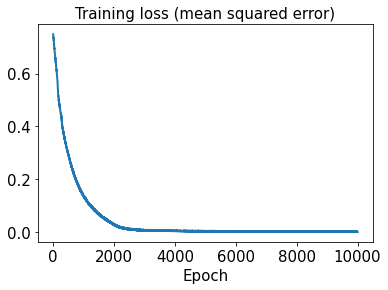

In [23]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

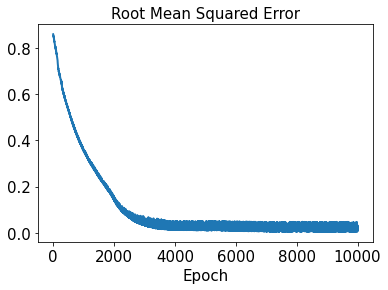

In [24]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [25]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_data, output_img)
sd2 = tf.keras.Model(input_data, output_img)
sd3 = tf.keras.Model(input_data, output_img)

In [26]:
sd1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 16)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2176      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                           

In [27]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [28]:
start1 = datetime.datetime.now()
history1 = sd1.fit(x_train1, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 12ms/step - loss: 0.5273 - rmse: 0.4950
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5222 - rmse: 0.4908
Epoch 3/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5175 - rmse: 0.4870
Epoch 4/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5131 - rmse: 0.4836
Epoch 5/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5094 - rmse: 0.4807
Epoch 6/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.5050 - rmse: 0.4771
Epoch 7/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.5016 - rmse: 0.4747
Epoch 8/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.4982 - rmse: 0.4721
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4948 - rmse: 0.4694
Epoch 10/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.4919 - rmse: 0.4674
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.3940 - rmse: 0.4323
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3921 - rmse: 0.4310
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3920 - rmse: 0.4318
Epoch 89/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3902 - rmse: 0.4305
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3889 - rmse: 0.4299
Epoch 91/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3880 - rmse: 0.4297
Epoch 92/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3865 - rmse: 0.4289
Epoch 93/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3873 - rmse: 0.4307
Epoch 94/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3852 - rmse: 0.4291
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3835 - rmse: 0.4279
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 0.2775 - rmse: 0.3533
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2760 - rmse: 0.3520
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2741 - rmse: 0.3501
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2724 - rmse: 0.3484
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2707 - rmse: 0.3467
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2689 - rmse: 0.3449
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2690 - rmse: 0.3458
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2659 - rmse: 0.3421
Epoch 178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2651 - rmse: 0.3416
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2629 - rmse: 0.3393
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.1496 - rmse: 0.1881
Epoch 255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1484 - rmse: 0.1861
Epoch 256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1475 - rmse: 0.1846
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1464 - rmse: 0.1828
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1458 - rmse: 0.1820
Epoch 259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1448 - rmse: 0.1804
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1445 - rmse: 0.1804
Epoch 261/10000
1/2 [==============>...............] - ETA: 0s - loss: 0.1439 - rmse: 0.1798

KeyboardInterrupt: 

In [ ]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

In [ ]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
test_results1 = sd1.evaluate(x_test1)

In [29]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [30]:
error_train_sensor1 = np.abs(decoded_sensor_train1 - x_train1)

In [31]:
error_train_sensor1

array([[[9.51799397e-02],
        [3.94326909e-02],
        [3.53729413e-02],
        [4.53633056e-02],
        [1.05240955e-02],
        [6.89562504e-02],
        [2.00837864e-02],
        [5.30613945e-02],
        [6.03395091e-02],
        [2.48291655e-02],
        [7.69020860e-02],
        [1.80344148e-02],
        [4.27320884e-02],
        [4.94316505e-02],
        [4.14675488e-02],
        [7.64874165e-02]],

       [[2.69027970e-01],
        [1.19663802e-01],
        [9.57490883e-02],
        [1.36038848e-01],
        [2.17410298e-02],
        [1.92576430e-01],
        [5.38993450e-02],
        [1.32118889e-01],
        [1.77839526e-01],
        [4.85795113e-02],
        [1.90028332e-01],
        [5.84092113e-02],
        [1.16300412e-01],
        [1.23850413e-01],
        [1.43491891e-01],
        [2.32935689e-01]],

       [[5.43655013e-02],
        [2.11682049e-02],
        [2.37672284e-02],
        [2.72836044e-02],
        [7.71782072e-03],
        [4.22102069e-02],
        

In [32]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.20630580994394235


In [33]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [34]:
decoded_train1 = sd1.predict(decoded_sensor_train1)

In [35]:
decoded_test1 = sd1.predict(decoded_sensor_test1)

In [36]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [37]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [38]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.19276187614073897


In [39]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.19405202080403067


In [40]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.2831270377660501, 0.030131260462913135, 0.22302493184939778, 0.2248208686670114, 0.12156031871555872, 0.2808645768255251, 0.16441605960845115, 0.3045683872783335, 0.14325447410774145, 0.3374355594705803, 0.32399077469218396, 0.10625717815480545, 0.2638294552676155, 0.0492372983467573, 0.2439713563548738, 0.12773881017218044, 0.2895609287425043, 0.04507623223381804, 0.1496091502004493, 0.29647589154336856, 0.3718343756720256, 0.17187068630407065, 0.3539756186730312, 0.10895151631929795, 0.31382393029831546, 0.2626487623501459, 0.07589795070090834, 0.09932395083256049, 0.016685217380978237, 0.11274656007275506, 0.18505448666538923, 0.27637997262103364, 0.39080864578273894]


In [41]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.14453932195008498, 0.20518458184376923, 0.20552349622523977, 0.18254203042564118, 0.1218988268322228, 0.38285580267552827, 0.07653282417138718, 0.39747498283056654]


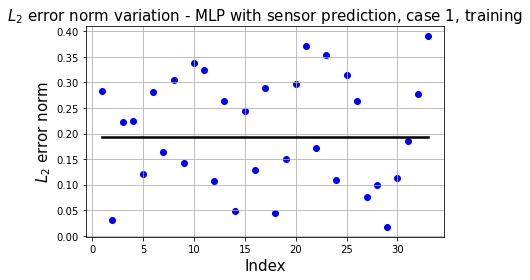

In [128]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

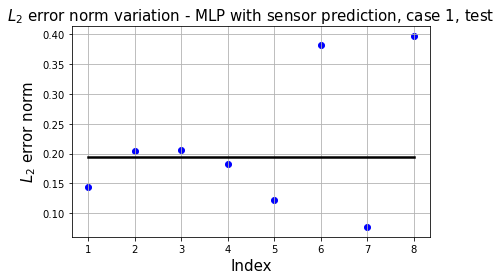

In [129]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

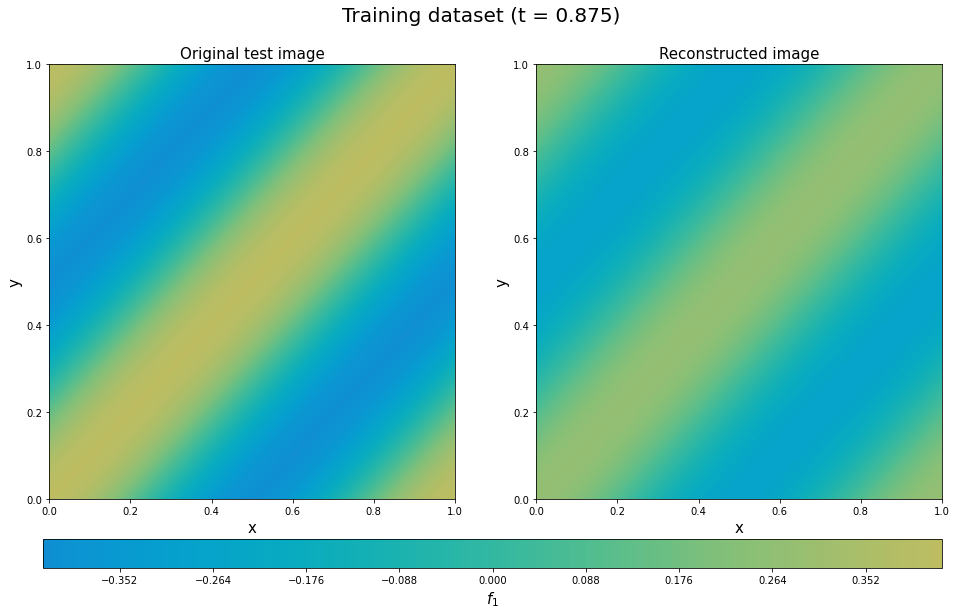

In [44]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

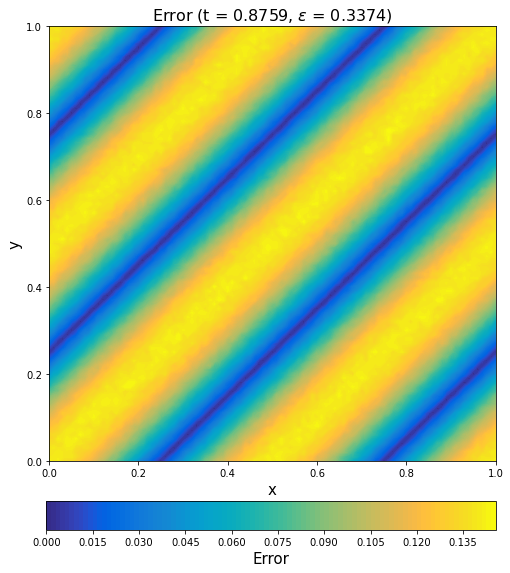

In [45]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

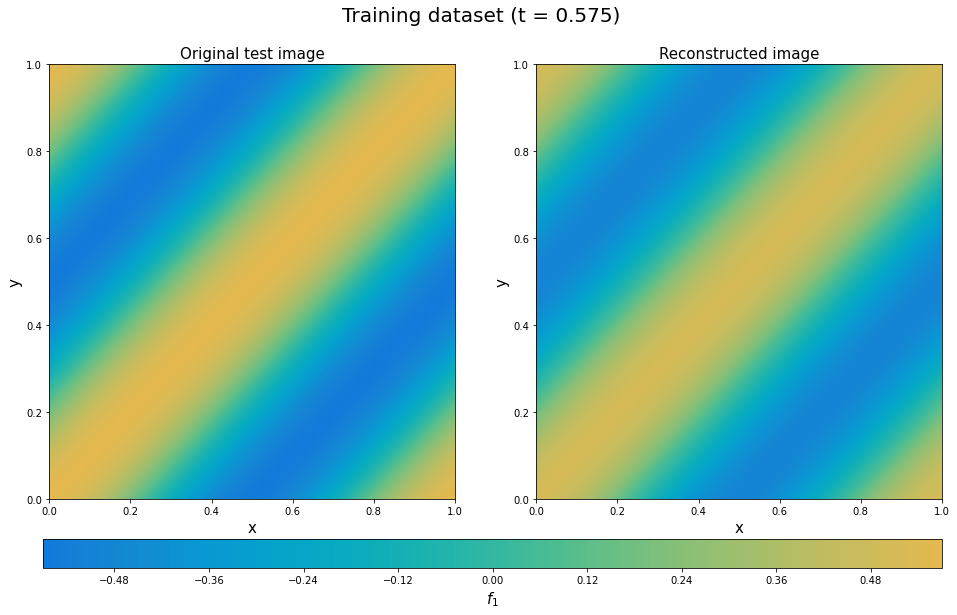

In [46]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

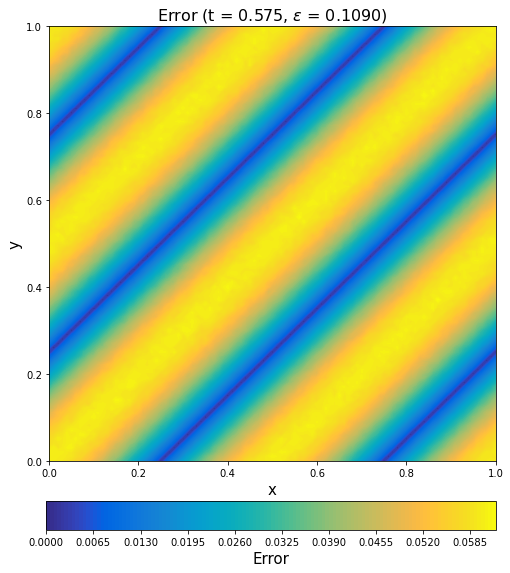

In [47]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

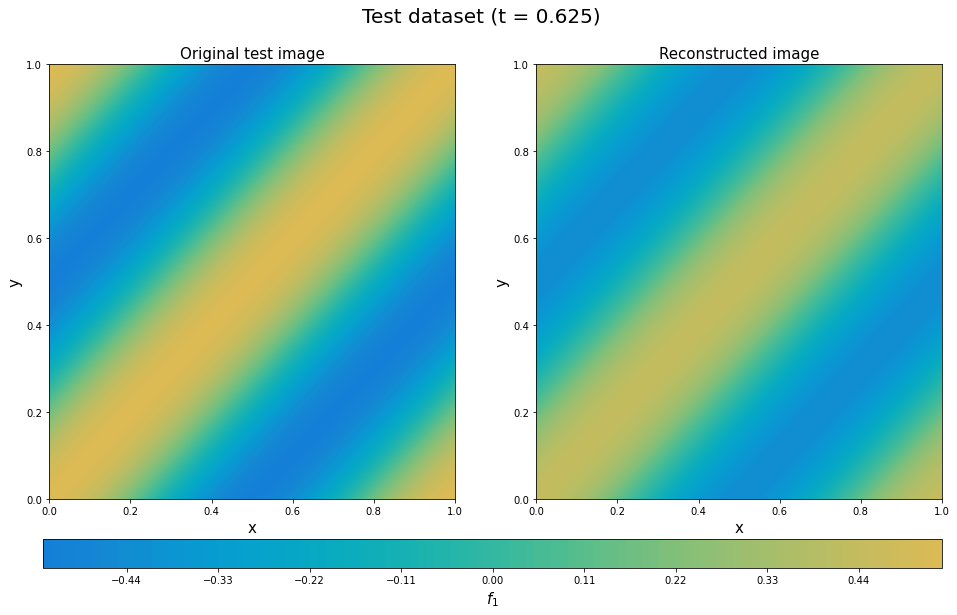

In [48]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

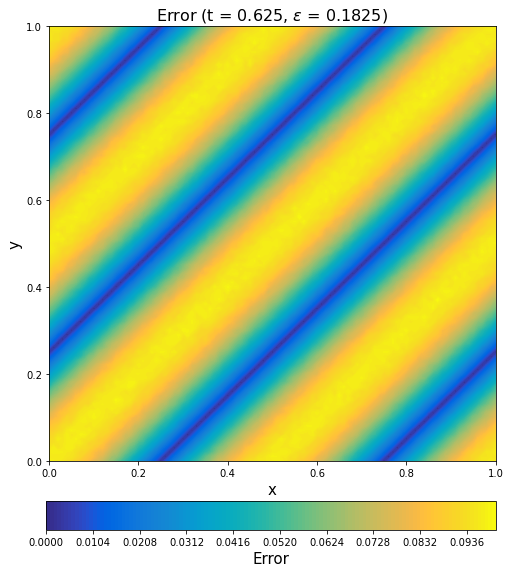

In [49]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

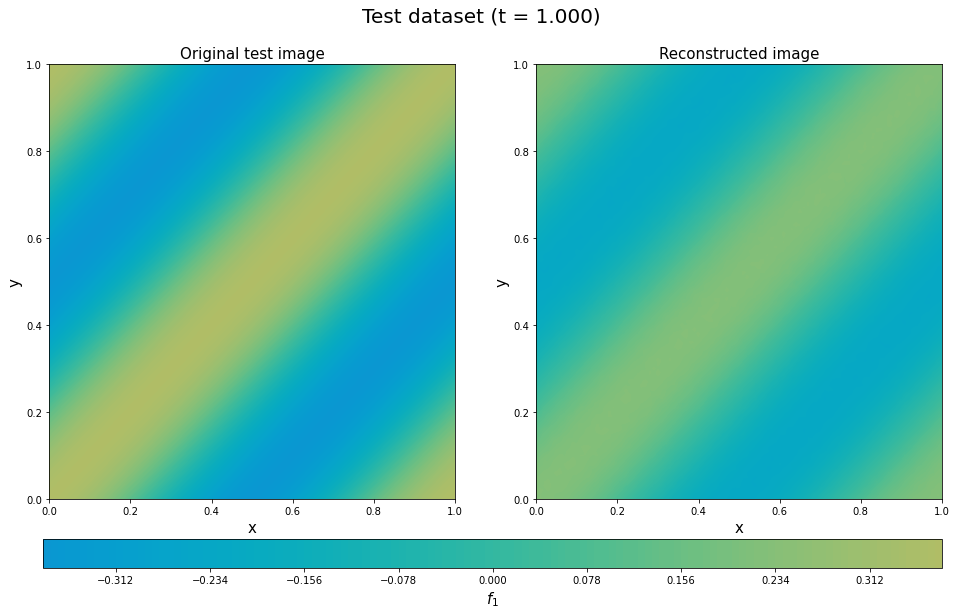

In [50]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

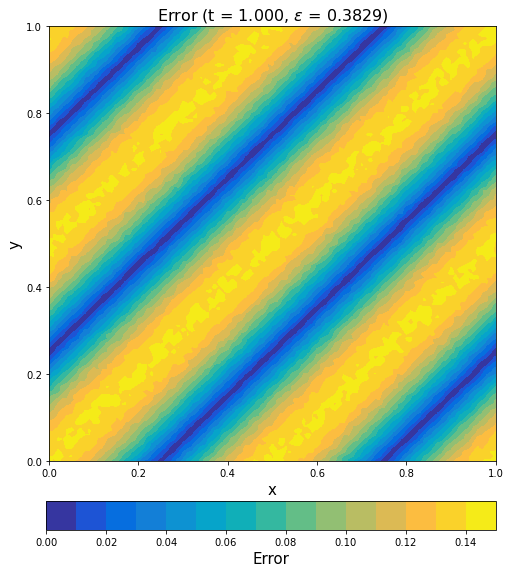

In [51]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [52]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [53]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [54]:
sensor2 = sensor2.reshape((41, 16, 1))

In [55]:
sensor2.shape

(41, 16, 1)

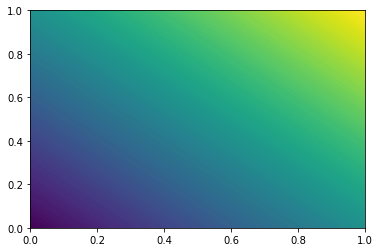

In [56]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [57]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [58]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [59]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [60]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [61]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 20ms/step - loss: 2.5904 - rmse: 1.6090
Epoch 2/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.5880 - rmse: 1.6082
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5855 - rmse: 1.6074
Epoch 4/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.5836 - rmse: 1.6068
Epoch 5/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5818 - rmse: 1.6063
Epoch 6/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.5795 - rmse: 1.6056
Epoch 7/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.5778 - rmse: 1.6050
Epoch 8/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.5763 - rmse: 1.6046
Epoch 9/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.5745 - rmse: 1.6040
Epoch 10/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.5723 - rmse: 1.6033
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 10ms/step - loss: 2.2676 - rmse: 1.5053
Epoch 170/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2653 - rmse: 1.5046
Epoch 171/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2633 - rmse: 1.5039
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2615 - rmse: 1.5033
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2600 - rmse: 1.5028
Epoch 174/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2595 - rmse: 1.5026
Epoch 175/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2558 - rmse: 1.5014
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2552 - rmse: 1.5012
Epoch 177/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2531 - rmse: 1.5005
Epoch 178/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2509 - rmse: 1.4998
Epoch 179/10000
2/2 [==================

2/2 [==============================] - 0s 9ms/step - loss: 1.9908 - rmse: 1.4104
Epoch 336/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9907 - rmse: 1.4103
Epoch 337/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9860 - rmse: 1.4087
Epoch 338/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9878 - rmse: 1.4093
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9826 - rmse: 1.4075
Epoch 340/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9828 - rmse: 1.4076
Epoch 341/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9810 - rmse: 1.4069
Epoch 342/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9802 - rmse: 1.4066
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9806 - rmse: 1.4068
Epoch 344/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9749 - rmse: 1.4048
Epoch 345/10000
2/2 [================

2/2 [==============================] - 0s 13ms/step - loss: 1.7382 - rmse: 1.3178
Epoch 502/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7402 - rmse: 1.3186
Epoch 503/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7387 - rmse: 1.3180
Epoch 504/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7371 - rmse: 1.3174
Epoch 505/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7314 - rmse: 1.3152
Epoch 506/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7301 - rmse: 1.3147
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7324 - rmse: 1.3156
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7268 - rmse: 1.3135
Epoch 509/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7286 - rmse: 1.3141
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7267 - rmse: 1.3134
Epoch 511/10000
2/2 [==================

2/2 [==============================] - 0s 10ms/step - loss: 1.4909 - rmse: 1.2203
Epoch 668/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4892 - rmse: 1.2197
Epoch 669/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4863 - rmse: 1.2185
Epoch 670/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4848 - rmse: 1.2179
Epoch 671/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4867 - rmse: 1.2186
Epoch 672/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4853 - rmse: 1.2181
Epoch 673/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4817 - rmse: 1.2166
Epoch 674/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4793 - rmse: 1.2156
Epoch 675/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4807 - rmse: 1.2162
Epoch 676/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4803 - rmse: 1.2160
Epoch 677/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 1.2564 - rmse: 1.1202
Epoch 834/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2509 - rmse: 1.1177
Epoch 835/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2504 - rmse: 1.1175
Epoch 836/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2480 - rmse: 1.1164
Epoch 837/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2486 - rmse: 1.1167
Epoch 838/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2452 - rmse: 1.1152
Epoch 839/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2439 - rmse: 1.1146
Epoch 840/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2435 - rmse: 1.1144
Epoch 841/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2411 - rmse: 1.1133
Epoch 842/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2398 - rmse: 1.1127
Epoch 843/10000
2/2 [=================

2/2 [==============================] - 0s 12ms/step - loss: 1.0345 - rmse: 1.0163
Epoch 1000/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0287 - rmse: 1.0134
Epoch 1001/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0275 - rmse: 1.0129
Epoch 1002/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0273 - rmse: 1.0128
Epoch 1003/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0243 - rmse: 1.0113
Epoch 1004/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0255 - rmse: 1.0119
Epoch 1005/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0219 - rmse: 1.0101
Epoch 1006/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0223 - rmse: 1.0103
Epoch 1007/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0203 - rmse: 1.0093
Epoch 1008/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0204 - rmse: 1.0094
Epoch 1009/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.9260 - rmse: 0.9615
Epoch 1083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9240 - rmse: 0.9604
Epoch 1084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9224 - rmse: 0.9596
Epoch 1085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9211 - rmse: 0.9589
Epoch 1086/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.9231 - rmse: 0.9600
Epoch 1087/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9253 - rmse: 0.9611
Epoch 1088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9223 - rmse: 0.9596
Epoch 1089/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.9220 - rmse: 0.9594
Epoch 1090/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9162 - rmse: 0.9563
Epoch 1091/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9151 - rmse: 0.9558
Epoch 1092/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.8289 - rmse: 0.9096
Epoch 1166/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8269 - rmse: 0.9085
Epoch 1167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8238 - rmse: 0.9068
Epoch 1168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8221 - rmse: 0.9058
Epoch 1169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8253 - rmse: 0.9076
Epoch 1170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8204 - rmse: 0.9049
Epoch 1171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8205 - rmse: 0.9049
Epoch 1172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8180 - rmse: 0.9035
Epoch 1173/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8170 - rmse: 0.9030
Epoch 1174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8154 - rmse: 0.9021
Epoch 1175/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.7377 - rmse: 0.8580
Epoch 1249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7333 - rmse: 0.8554
Epoch 1250/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7381 - rmse: 0.8582
Epoch 1251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7370 - rmse: 0.8576
Epoch 1252/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7358 - rmse: 0.8568
Epoch 1253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7352 - rmse: 0.8565
Epoch 1254/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7288 - rmse: 0.8528
Epoch 1255/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7302 - rmse: 0.8536
Epoch 1256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7258 - rmse: 0.8510
Epoch 1257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7272 - rmse: 0.8518
Epoch 1258/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.6483 - rmse: 0.8042
Epoch 1332/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6499 - rmse: 0.8052
Epoch 1333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6502 - rmse: 0.8054
Epoch 1334/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6434 - rmse: 0.8012
Epoch 1335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6426 - rmse: 0.8007
Epoch 1336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6428 - rmse: 0.8008
Epoch 1337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6443 - rmse: 0.8017
Epoch 1338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6405 - rmse: 0.7993
Epoch 1339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6447 - rmse: 0.8020
Epoch 1340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6402 - rmse: 0.7991
Epoch 1341/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.5699 - rmse: 0.7539
Epoch 1415/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5713 - rmse: 0.7548
Epoch 1416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5709 - rmse: 0.7545
Epoch 1417/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5667 - rmse: 0.7518
Epoch 1418/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5658 - rmse: 0.7511
Epoch 1419/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5662 - rmse: 0.7514
Epoch 1420/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5669 - rmse: 0.7519
Epoch 1421/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5631 - rmse: 0.7494
Epoch 1422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5634 - rmse: 0.7495
Epoch 1423/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5615 - rmse: 0.7483
Epoch 1424/10000
2/2 [==========

2/2 [==============================] - 0s 13ms/step - loss: 0.4360 - rmse: 0.6591
Epoch 1581/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4343 - rmse: 0.6578
Epoch 1582/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4335 - rmse: 0.6572
Epoch 1583/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4320 - rmse: 0.6561
Epoch 1584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4316 - rmse: 0.6557
Epoch 1585/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4309 - rmse: 0.6552
Epoch 1586/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4364 - rmse: 0.6594
Epoch 1587/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4304 - rmse: 0.6548
Epoch 1588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4304 - rmse: 0.6549
Epoch 1589/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4288 - rmse: 0.6536
Epoch 1590/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.3228 - rmse: 0.5668
Epoch 1747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3218 - rmse: 0.5659
Epoch 1748/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3202 - rmse: 0.5645
Epoch 1749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3249 - rmse: 0.5686
Epoch 1750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3222 - rmse: 0.5662
Epoch 1751/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3227 - rmse: 0.5667
Epoch 1752/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3216 - rmse: 0.5657
Epoch 1753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3209 - rmse: 0.5651
Epoch 1754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3171 - rmse: 0.5617
Epoch 1755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3166 - rmse: 0.5613
Epoch 1756/10000
2/2 [======

Epoch 1829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2806 - rmse: 0.5282
Epoch 1830/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2741 - rmse: 0.5221
Epoch 1831/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2746 - rmse: 0.5225
Epoch 1832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2739 - rmse: 0.5219
Epoch 1833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2720 - rmse: 0.5200
Epoch 1834/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2768 - rmse: 0.5246
Epoch 1835/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2748 - rmse: 0.5228
Epoch 1836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2702 - rmse: 0.5183
Epoch 1837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2698 - rmse: 0.5179
Epoch 1838/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2746 - rmse: 0.5225
Epoch 1839

2/2 [==============================] - 0s 11ms/step - loss: 0.1961 - rmse: 0.4411
Epoch 1995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1951 - rmse: 0.4399
Epoch 1996/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2004 - rmse: 0.4459
Epoch 1997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2001 - rmse: 0.4456
Epoch 1998/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1941 - rmse: 0.4388
Epoch 1999/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1970 - rmse: 0.4421
Epoch 2000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1926 - rmse: 0.4371
Epoch 2001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1928 - rmse: 0.4373
Epoch 2002/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1921 - rmse: 0.4365
Epoch 2003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1923 - rmse: 0.4368
Epoch 2004/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.1687 - rmse: 0.4088
Epoch 2078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1623 - rmse: 0.4009
Epoch 2079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1649 - rmse: 0.4041
Epoch 2080/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1614 - rmse: 0.3998
Epoch 2081/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1615 - rmse: 0.3999
Epoch 2082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1605 - rmse: 0.3987
Epoch 2083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1676 - rmse: 0.4075
Epoch 2084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1611 - rmse: 0.3995
Epoch 2085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1623 - rmse: 0.4009
Epoch 2086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1648 - rmse: 0.4040
Epoch 2087/10000
2/2 [======

2/2 [==============================] - 0s 13ms/step - loss: 0.1397 - rmse: 0.3717
Epoch 2161/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1393 - rmse: 0.3712
Epoch 2162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1396 - rmse: 0.3716
Epoch 2163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1361 - rmse: 0.3669
Epoch 2164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1369 - rmse: 0.3678
Epoch 2165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1404 - rmse: 0.3727
Epoch 2166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1336 - rmse: 0.3634
Epoch 2167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1326 - rmse: 0.3620
Epoch 2168/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1357 - rmse: 0.3663
Epoch 2169/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1340 - rmse: 0.3640
Epoch 2170/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.1116 - rmse: 0.3318
Epoch 2244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1122 - rmse: 0.3326
Epoch 2245/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1109 - rmse: 0.3306
Epoch 2246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1168 - rmse: 0.3395
Epoch 2247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1131 - rmse: 0.3339
Epoch 2248/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1111 - rmse: 0.3309
Epoch 2249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1128 - rmse: 0.3335
Epoch 2250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1137 - rmse: 0.3349
Epoch 2251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1094 - rmse: 0.3284
Epoch 2252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1082 - rmse: 0.3266
Epoch 2253/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0902 - rmse: 0.2977
Epoch 2327/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0910 - rmse: 0.2991
Epoch 2328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0929 - rmse: 0.3022
Epoch 2329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0924 - rmse: 0.3015
Epoch 2330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0911 - rmse: 0.2992
Epoch 2331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0913 - rmse: 0.2995
Epoch 2332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0901 - rmse: 0.2975
Epoch 2333/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0895 - rmse: 0.2966
Epoch 2334/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0886 - rmse: 0.2950
Epoch 2335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0947 - rmse: 0.3052
Epoch 2336/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0734 - rmse: 0.2680
Epoch 2410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0805 - rmse: 0.2809
Epoch 2411/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0769 - rmse: 0.2745
Epoch 2412/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0799 - rmse: 0.2799
Epoch 2413/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0783 - rmse: 0.2770
Epoch 2414/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0739 - rmse: 0.2690
Epoch 2415/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0774 - rmse: 0.2754
Epoch 2416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0722 - rmse: 0.2658
Epoch 2417/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0736 - rmse: 0.2684
Epoch 2418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0798 - rmse: 0.2797
Epoch 2419/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0601 - rmse: 0.2420
Epoch 2493/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0613 - rmse: 0.2444
Epoch 2494/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0607 - rmse: 0.2431
Epoch 2495/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0596 - rmse: 0.2409
Epoch 2496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0656 - rmse: 0.2530
Epoch 2497/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0585 - rmse: 0.2387
Epoch 2498/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0585 - rmse: 0.2386
Epoch 2499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0592 - rmse: 0.2401
Epoch 2500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0582 - rmse: 0.2381
Epoch 2501/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0619 - rmse: 0.2457
Epoch 2502/10000
2/2 [======

Epoch 2575/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0522 - rmse: 0.2250
Epoch 2576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0490 - rmse: 0.2178
Epoch 2577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0481 - rmse: 0.2157
Epoch 2578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0531 - rmse: 0.2272
Epoch 2579/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0488 - rmse: 0.2174
Epoch 2580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0473 - rmse: 0.2140
Epoch 2581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0483 - rmse: 0.2162
Epoch 2582/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0475 - rmse: 0.2143
Epoch 2583/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0498 - rmse: 0.2196
Epoch 2584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0499 - rmse: 0.2199
Epoch 2585/

2/2 [==============================] - 0s 11ms/step - loss: 0.0347 - rmse: 0.1821
Epoch 2741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0302 - rmse: 0.1693
Epoch 2742/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0377 - rmse: 0.1900
Epoch 2743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0330 - rmse: 0.1773
Epoch 2744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - rmse: 0.1887
Epoch 2745/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0341 - rmse: 0.1803
Epoch 2746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - rmse: 0.1774
Epoch 2747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0300 - rmse: 0.1687
Epoch 2748/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0311 - rmse: 0.1718
Epoch 2749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - rmse: 0.1877
Epoch 2750/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0297 - rmse: 0.1678
Epoch 2824/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0254 - rmse: 0.1546
Epoch 2825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0255 - rmse: 0.1548
Epoch 2826/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0290 - rmse: 0.1659
Epoch 2827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0288 - rmse: 0.1650
Epoch 2828/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0254 - rmse: 0.1545
Epoch 2829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0278 - rmse: 0.1621
Epoch 2830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0245 - rmse: 0.1514
Epoch 2831/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0247 - rmse: 0.1523
Epoch 2832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0262 - rmse: 0.1571
Epoch 2833/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0220 - rmse: 0.1431
Epoch 2907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0204 - rmse: 0.1374
Epoch 2908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0277 - rmse: 0.1618
Epoch 2909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0222 - rmse: 0.1436
Epoch 2910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0212 - rmse: 0.1403
Epoch 2911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0222 - rmse: 0.1437
Epoch 2912/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0230 - rmse: 0.1465
Epoch 2913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0259 - rmse: 0.1560
Epoch 2914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0207 - rmse: 0.1383
Epoch 2915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0201 - rmse: 0.1364
Epoch 2916/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0214 - rmse: 0.1411
Epoch 2990/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.1343
Epoch 2991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0173 - rmse: 0.1254
Epoch 2992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0166 - rmse: 0.1229
Epoch 2993/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0164 - rmse: 0.1218
Epoch 2994/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0202 - rmse: 0.1366
Epoch 2995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0165 - rmse: 0.1222
Epoch 2996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.1260
Epoch 2997/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0177 - rmse: 0.1273
Epoch 2998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0162 - rmse: 0.1209
Epoch 2999/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0140 - rmse: 0.1118
Epoch 3073/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0189 - rmse: 0.1316
Epoch 3074/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0162 - rmse: 0.1209
Epoch 3075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0140 - rmse: 0.1116
Epoch 3076/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0166 - rmse: 0.1227
Epoch 3077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0152 - rmse: 0.1171
Epoch 3078/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0171 - rmse: 0.1249
Epoch 3079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0188 - rmse: 0.1313
Epoch 3080/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0157 - rmse: 0.1188
Epoch 3081/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0197 - rmse: 0.1350
Epoch 3082/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1025
Epoch 3239/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0175 - rmse: 0.1263
Epoch 3240/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - rmse: 0.0991
Epoch 3241/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.1007
Epoch 3242/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0141 - rmse: 0.1121
Epoch 3243/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0176 - rmse: 0.1268
Epoch 3244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0955
Epoch 3245/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0120 - rmse: 0.1024
Epoch 3246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0132 - rmse: 0.1079
Epoch 3247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0975
Epoch 3248/10000
2/2 [==========

2/2 [==============================] - 0s 13ms/step - loss: 0.0127 - rmse: 0.1055
Epoch 3405/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0923
Epoch 3406/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0088 - rmse: 0.0853
Epoch 3407/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0089 - rmse: 0.0859
Epoch 3408/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - rmse: 0.0959
Epoch 3409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1031
Epoch 3410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0974
Epoch 3411/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1025
Epoch 3412/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0100 - rmse: 0.0920
Epoch 3413/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0854
Epoch 3414/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0815
Epoch 3571/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0815
Epoch 3572/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0118 - rmse: 0.1016
Epoch 3573/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - rmse: 0.0984
Epoch 3574/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0123 - rmse: 0.1037
Epoch 3575/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0103 - rmse: 0.0935
Epoch 3576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0082 - rmse: 0.0820
Epoch 3577/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0806
Epoch 3578/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0807
Epoch 3579/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0808
Epoch 3580/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0791
Epoch 3737/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0817
Epoch 3738/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - rmse: 0.0924
Epoch 3739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0782
Epoch 3740/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0136 - rmse: 0.1099
Epoch 3741/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0843
Epoch 3742/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0131 - rmse: 0.1076
Epoch 3743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - rmse: 0.0995
Epoch 3744/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0105 - rmse: 0.0946
Epoch 3745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0878
Epoch 3746/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0786
Epoch 3820/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0811
Epoch 3821/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0127 - rmse: 0.1060
Epoch 3822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0777
Epoch 3823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0790
Epoch 3824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0811
Epoch 3825/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0897
Epoch 3826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0103 - rmse: 0.0937
Epoch 3827/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0780
Epoch 3828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0133 - rmse: 0.1086
Epoch 3829/10000
2/2 [======

2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0937
Epoch 3903/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0096 - rmse: 0.0901
Epoch 3904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0823
Epoch 3905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0783
Epoch 3906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0810
Epoch 3907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.1072
Epoch 3908/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0968
Epoch 3909/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0791
Epoch 3910/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0089 - rmse: 0.0858
Epoch 3911/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0785
Epoch 3912/10000
2/2 [=======

2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0883
Epoch 3986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0805
Epoch 3987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.1107
Epoch 3988/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0981
Epoch 3989/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0783
Epoch 3990/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0124 - rmse: 0.1046
Epoch 3991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0774
Epoch 3992/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - rmse: 0.0993
Epoch 3993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0780
Epoch 3994/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0811
Epoch 3995/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0140 - rmse: 0.1117
Epoch 4152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.0985
Epoch 4153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0778
Epoch 4154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0117 - rmse: 0.1009
Epoch 4155/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0868
Epoch 4156/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0906
Epoch 4157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0771
Epoch 4158/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0792
Epoch 4159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0791
Epoch 4160/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0772
Epoch 4161/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0124 - rmse: 0.1042
Epoch 4318/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0771
Epoch 4319/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0778
Epoch 4320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.1078
Epoch 4321/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0761
Epoch 4322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0886
Epoch 4323/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0092 - rmse: 0.0880
Epoch 4324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0865
Epoch 4325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.1044
Epoch 4326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0863
Epoch 4327/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0767
Epoch 4401/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0124 - rmse: 0.1045
Epoch 4402/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0829
Epoch 4403/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0847
Epoch 4404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0867
Epoch 4405/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0146 - rmse: 0.1145
Epoch 4406/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0124 - rmse: 0.1045
Epoch 4407/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0808
Epoch 4408/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0854
Epoch 4409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.0958
Epoch 4410/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0829
Epoch 4484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0883
Epoch 4485/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0768
Epoch 4486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0860
Epoch 4487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0847
Epoch 4488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0137 - rmse: 0.1106
Epoch 4489/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0102 - rmse: 0.0931
Epoch 4490/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0094 - rmse: 0.0888
Epoch 4491/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0889
Epoch 4492/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0825
Epoch 4493/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0944
Epoch 4567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0103 - rmse: 0.0942
Epoch 4568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.1086
Epoch 4569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0777
Epoch 4570/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0833
Epoch 4571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0810
Epoch 4572/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0855
Epoch 4573/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.0955
Epoch 4574/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0969
Epoch 4575/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0752
Epoch 4576/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0107 - rmse: 0.0962
Epoch 4650/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0089 - rmse: 0.0863
Epoch 4651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0767
Epoch 4652/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0749
Epoch 4653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0916
Epoch 4654/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0110 - rmse: 0.0976
Epoch 4655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0827
Epoch 4656/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0113 - rmse: 0.0990
Epoch 4657/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0125 - rmse: 0.1049
Epoch 4658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.1027
Epoch 4659/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0763
Epoch 4733/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0104 - rmse: 0.0943
Epoch 4734/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0844
Epoch 4735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.1082
Epoch 4736/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0107 - rmse: 0.0961
Epoch 4737/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0126 - rmse: 0.1056
Epoch 4738/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.1017
Epoch 4739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0124 - rmse: 0.1046
Epoch 4740/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0814
Epoch 4741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.0960
Epoch 4742/10000
2/2 [======

Epoch 4815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0749
Epoch 4816/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0747
Epoch 4817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0120 - rmse: 0.1028
Epoch 4818/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0125 - rmse: 0.1051
Epoch 4819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0807
Epoch 4820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0758
Epoch 4821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0753
Epoch 4822/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0846
Epoch 4823/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0972
Epoch 4824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0136 - rmse: 0.1101
Epoch 4825/

Epoch 4980/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0747
Epoch 4981/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0126 - rmse: 0.1057
Epoch 4982/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0922
Epoch 4983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0876
Epoch 4984/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0755
Epoch 4985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0747
Epoch 4986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0746
Epoch 4987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0900
Epoch 4988/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0135 - rmse: 0.1098
Epoch 4989/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0920
Epoch 4990/

Epoch 5145/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0118 - rmse: 0.1019
Epoch 5146/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0812
Epoch 5147/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0936
Epoch 5148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0130 - rmse: 0.1075
Epoch 5149/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0101 - rmse: 0.0929
Epoch 5150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.0958
Epoch 5151/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0123 - rmse: 0.1042
Epoch 5152/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0777
Epoch 5153/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0141 - rmse: 0.1124
Epoch 5154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0118 - rmse: 0.1016
Epoch 5155/1

2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0803
Epoch 5311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0719
Epoch 5312/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.1004
Epoch 5313/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0105 - rmse: 0.0950
Epoch 5314/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0089 - rmse: 0.0863
Epoch 5315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.1031
Epoch 5316/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0731
Epoch 5317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0818
Epoch 5318/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.1004
Epoch 5319/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0729
Epoch 5320/10000
2/2 [======

Epoch 5393/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0785
Epoch 5394/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0967
Epoch 5395/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0717
Epoch 5396/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0800
Epoch 5397/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - rmse: 0.0898
Epoch 5398/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0837
Epoch 5399/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0122 - rmse: 0.1040
Epoch 5400/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0887
Epoch 5401/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0735
Epoch 5402/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0821
Epoch 5403/

Epoch 5476/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0746
Epoch 5477/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0893
Epoch 5478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.1042
Epoch 5479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0883
Epoch 5480/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0728
Epoch 5481/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - rmse: 0.0995
Epoch 5482/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0812
Epoch 5483/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0811
Epoch 5484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0138 - rmse: 0.1112
Epoch 5485/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0818
Epoch 5486/100

Epoch 5559/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0873
Epoch 5560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0910
Epoch 5561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0724
Epoch 5562/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0068 - rmse: 0.0729
Epoch 5563/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0716
Epoch 5564/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0116 - rmse: 0.1009
Epoch 5565/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0706
Epoch 5566/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0790
Epoch 5567/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0832
Epoch 5568/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0115 - rmse: 0.1004
Epoch 5569/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - rmse: 0.1036
Epoch 5643/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0712
Epoch 5644/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - rmse: 0.0964
Epoch 5645/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0729
Epoch 5646/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0913
Epoch 5647/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0729
Epoch 5648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0705
Epoch 5649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.1065
Epoch 5650/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0886
Epoch 5651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.1065
Epoch 5652/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0727
Epoch 5809/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0769
Epoch 5810/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0916
Epoch 5811/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0699
Epoch 5812/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - rmse: 0.0905
Epoch 5813/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0708
Epoch 5814/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0135 - rmse: 0.1099
Epoch 5815/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0808
Epoch 5816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0836
Epoch 5817/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0102 - rmse: 0.0938
Epoch 5818/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0718
Epoch 5975/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0716
Epoch 5976/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0918
Epoch 5977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0730
Epoch 5978/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0804
Epoch 5979/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0921
Epoch 5980/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0779
Epoch 5981/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0923
Epoch 5982/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0086 - rmse: 0.0845
Epoch 5983/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0722
Epoch 5984/10000
2/2 [=========

Epoch 6140/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0801
Epoch 6141/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0738
Epoch 6142/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - rmse: 0.0916
Epoch 6143/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - rmse: 0.0963
Epoch 6144/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0748
Epoch 6145/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.1079
Epoch 6146/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.1076
Epoch 6147/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.0959
Epoch 6148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.1012
Epoch 6149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0925
Epoch 6150/

2/2 [==============================] - 0s 11ms/step - loss: 0.0119 - rmse: 0.1026
Epoch 6306/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0699
Epoch 6307/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0699
Epoch 6308/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0127 - rmse: 0.1063
Epoch 6309/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0739
Epoch 6310/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0932
Epoch 6311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.0992
Epoch 6312/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0119 - rmse: 0.1023
Epoch 6313/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0771
Epoch 6314/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0782
Epoch 6315/10000
2/2 [======

Epoch 6388/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0126 - rmse: 0.1057
Epoch 6389/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.1014
Epoch 6390/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0113 - rmse: 0.0993
Epoch 6391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0769
Epoch 6392/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0706
Epoch 6393/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0777
Epoch 6394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0790
Epoch 6395/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0742
Epoch 6396/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0692
Epoch 6397/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0931
Epoch 6398/

2/2 [==============================] - 0s 11ms/step - loss: 0.0114 - rmse: 0.1002
Epoch 6554/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0121 - rmse: 0.1034
Epoch 6555/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0688
Epoch 6556/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0683
Epoch 6557/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0806
Epoch 6558/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0793
Epoch 6559/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0681
Epoch 6560/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0115 - rmse: 0.1006
Epoch 6561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0908
Epoch 6562/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0704
Epoch 6563/10000
2/2 [=======

Epoch 6636/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0767
Epoch 6637/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0133 - rmse: 0.1090
Epoch 6638/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0782
Epoch 6639/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0110 - rmse: 0.0981
Epoch 6640/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0891
Epoch 6641/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0114 - rmse: 0.1003
Epoch 6642/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0857
Epoch 6643/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0717
Epoch 6644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.1017
Epoch 6645/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0920
Epoch 6646/1

2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0672
Epoch 6802/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0852
Epoch 6803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.1004
Epoch 6804/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0113 - rmse: 0.0995
Epoch 6805/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1036
Epoch 6806/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0121 - rmse: 0.1036
Epoch 6807/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0678
Epoch 6808/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0670
Epoch 6809/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0880
Epoch 6810/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0760
Epoch 6811/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0841
Epoch 6885/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0672
Epoch 6886/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0665
Epoch 6887/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.0933
Epoch 6888/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0654
Epoch 6889/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0123 - rmse: 0.1044
Epoch 6890/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0726
Epoch 6891/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0663
Epoch 6892/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0869
Epoch 6893/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0696
Epoch 6894/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0764
Epoch 6968/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0748
Epoch 6969/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0748
Epoch 6970/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0771
Epoch 6971/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.0964
Epoch 6972/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0905
Epoch 6973/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0682
Epoch 6974/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.0958
Epoch 6975/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0846
Epoch 6976/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0666
Epoch 6977/10000
2/2 [=====

Epoch 7050/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0680
Epoch 7051/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0721
Epoch 7052/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0708
Epoch 7053/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0652
Epoch 7054/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0725
Epoch 7055/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0112 - rmse: 0.0993
Epoch 7056/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0958
Epoch 7057/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0874
Epoch 7058/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0779
Epoch 7059/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0107 - rmse: 0.0966
Epoch 7060/

Epoch 7215/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0122 - rmse: 0.1041
Epoch 7216/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0680
Epoch 7217/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0666
Epoch 7218/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0692
Epoch 7219/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.1079
Epoch 7220/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0838
Epoch 7221/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0113 - rmse: 0.0998
Epoch 7222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0670
Epoch 7223/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0113 - rmse: 0.0997
Epoch 7224/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0894
Epoch 7225

Epoch 7380/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0123 - rmse: 0.1044
Epoch 7381/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.1070
Epoch 7382/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0905
Epoch 7383/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0113 - rmse: 0.1000
Epoch 7384/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0897
Epoch 7385/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0745
Epoch 7386/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0660
Epoch 7387/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0656
Epoch 7388/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0650
Epoch 7389/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0640
Epoch 7390/

2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0644
Epoch 7546/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0649
Epoch 7547/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0748
Epoch 7548/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0660
Epoch 7549/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0900
Epoch 7550/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0725
Epoch 7551/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0663
Epoch 7552/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0915
Epoch 7553/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0638
Epoch 7554/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0778
Epoch 7555/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - rmse: 0.0918
Epoch 7629/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0655
Epoch 7630/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0758
Epoch 7631/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0837
Epoch 7632/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0118 - rmse: 0.1022
Epoch 7633/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0829
Epoch 7634/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0867
Epoch 7635/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0663
Epoch 7636/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0642
Epoch 7637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0645
Epoch 7638/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0840
Epoch 7712/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0686
Epoch 7713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0651
Epoch 7714/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - rmse: 0.1036
Epoch 7715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0900
Epoch 7716/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0962
Epoch 7717/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0699
Epoch 7718/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0647
Epoch 7719/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0120 - rmse: 0.1031
Epoch 7720/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0681
Epoch 7721/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0629
Epoch 7795/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0115 - rmse: 0.1008
Epoch 7796/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0888
Epoch 7797/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0732
Epoch 7798/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0826
Epoch 7799/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0631
Epoch 7800/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0104 - rmse: 0.0953
Epoch 7801/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.1017
Epoch 7802/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0940
Epoch 7803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0803
Epoch 7804/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0827
Epoch 7878/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0655
Epoch 7879/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0655
Epoch 7880/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0891
Epoch 7881/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0110 - rmse: 0.0985
Epoch 7882/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0629
Epoch 7883/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0698
Epoch 7884/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0624
Epoch 7885/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0665
Epoch 7886/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0623
Epoch 7887/10000
2/2 [=====

Epoch 7960/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0981
Epoch 7961/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0842
Epoch 7962/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0617
Epoch 7963/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0766
Epoch 7964/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0616
Epoch 7965/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0691
Epoch 7966/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0623
Epoch 7967/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0104 - rmse: 0.0953
Epoch 7968/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0850
Epoch 7969/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0628
Epoch 7970/

2/2 [==============================] - 0s 10ms/step - loss: 0.0107 - rmse: 0.0970
Epoch 8126/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0693
Epoch 8127/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0731
Epoch 8128/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - rmse: 0.0946
Epoch 8129/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0839
Epoch 8130/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0740
Epoch 8131/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0717
Epoch 8132/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0107 - rmse: 0.0969
Epoch 8133/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0762
Epoch 8134/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0839
Epoch 8135/10000
2/2 [======

Epoch 8208/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.0970
Epoch 8209/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0634
Epoch 8210/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0819
Epoch 8211/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0731
Epoch 8212/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0611
Epoch 8213/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0714
Epoch 8214/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0669
Epoch 8215/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0757
Epoch 8216/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0614
Epoch 8217/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0684
Epoch 8218/

2/2 [==============================] - 0s 9ms/step - loss: 0.0091 - rmse: 0.0882
Epoch 8374/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0664
Epoch 8375/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0681
Epoch 8376/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0633
Epoch 8377/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0701
Epoch 8378/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0620
Epoch 8379/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - rmse: 0.0933
Epoch 8380/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0731
Epoch 8381/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0624
Epoch 8382/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0063 - rmse: 0.0707
Epoch 8383/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - rmse: 0.0936
Epoch 8540/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0604
Epoch 8541/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0676
Epoch 8542/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0616
Epoch 8543/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0109 - rmse: 0.0980
Epoch 8544/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0093 - rmse: 0.0895
Epoch 8545/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0107 - rmse: 0.0968
Epoch 8546/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0765
Epoch 8547/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0715
Epoch 8548/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0620
Epoch 8549/10000
2/2 [==========

2/2 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0924
Epoch 8706/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0609
Epoch 8707/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0840
Epoch 8708/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0681
Epoch 8709/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0726
Epoch 8710/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0748
Epoch 8711/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0673
Epoch 8712/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0601
Epoch 8713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0835
Epoch 8714/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0722
Epoch 8715/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0853
Epoch 8872/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0593
Epoch 8873/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0617
Epoch 8874/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0722
Epoch 8875/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0656
Epoch 8876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0771
Epoch 8877/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0123 - rmse: 0.1050
Epoch 8878/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0606
Epoch 8879/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1040
Epoch 8880/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.0967
Epoch 8881/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0749
Epoch 9038/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0618
Epoch 9039/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0726
Epoch 9040/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0679
Epoch 9041/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0774
Epoch 9042/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0697
Epoch 9043/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0755
Epoch 9044/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0604
Epoch 9045/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0604
Epoch 9046/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0938
Epoch 9047/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0759
Epoch 9203/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0586
Epoch 9204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0818
Epoch 9205/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0819
Epoch 9206/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0687
Epoch 9207/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0578
Epoch 9208/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0826
Epoch 9209/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0582
Epoch 9210/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0579
Epoch 9211/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0091 - rmse: 0.0886
Epoch 9212/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0584
Epoch 9286/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0922
Epoch 9287/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0878
Epoch 9288/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0634
Epoch 9289/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0594
Epoch 9290/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0928
Epoch 9291/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0795
Epoch 9292/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0683
Epoch 9293/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0684
Epoch 9294/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0657
Epoch 9295/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0595
Epoch 9369/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0857
Epoch 9370/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1037
Epoch 9371/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0913
Epoch 9372/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0637
Epoch 9373/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0600
Epoch 9374/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0595
Epoch 9375/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0842
Epoch 9376/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0868
Epoch 9377/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0819
Epoch 9378/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0604
Epoch 9452/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0660
Epoch 9453/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0765
Epoch 9454/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0642
Epoch 9455/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0862
Epoch 9456/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0585
Epoch 9457/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0912
Epoch 9458/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0879
Epoch 9459/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0647
Epoch 9460/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0581
Epoch 9461/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.1031
Epoch 9535/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0841
Epoch 9536/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0685
Epoch 9537/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0665
Epoch 9538/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0089 - rmse: 0.0874
Epoch 9539/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0570
Epoch 9540/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0793
Epoch 9541/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0583
Epoch 9542/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0995
Epoch 9543/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0653
Epoch 9544/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0654
Epoch 9618/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0599
Epoch 9619/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0825
Epoch 9620/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0598
Epoch 9621/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0909
Epoch 9622/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0977
Epoch 9623/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0103 - rmse: 0.0952
Epoch 9624/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0101 - rmse: 0.0943
Epoch 9625/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0731
Epoch 9626/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0840
Epoch 9627/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0791
Epoch 9784/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0577
Epoch 9785/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0729
Epoch 9786/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0951
Epoch 9787/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0597
Epoch 9788/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0119 - rmse: 0.1033
Epoch 9789/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0788
Epoch 9790/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0617
Epoch 9791/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0582
Epoch 9792/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0627
Epoch 9793/10000
2/2 [=====

Epoch 9866/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0108 - rmse: 0.0982
Epoch 9867/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - rmse: 0.0911
Epoch 9868/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0591
Epoch 9869/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0823
Epoch 9870/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0585
Epoch 9871/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.0994
Epoch 9872/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0608
Epoch 9873/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0657
Epoch 9874/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.0996
Epoch 9875/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0118 - rmse: 0.1030
Epoch 9876/1

In [62]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:59.536826


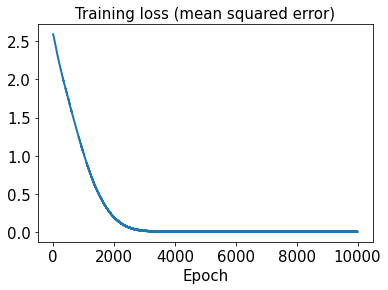

In [63]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

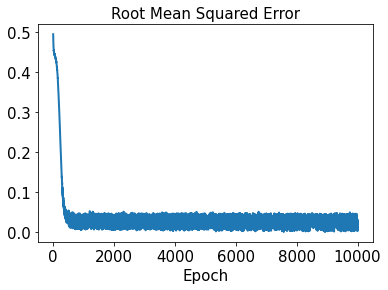

In [64]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [65]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [66]:
start2 = datetime.datetime.now()
history2 = sd2.fit(x_train2, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 16ms/step - loss: 2.6787 - rmse: 1.6367
Epoch 2/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6699 - rmse: 1.6340
Epoch 3/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6617 - rmse: 1.6315
Epoch 4/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.6535 - rmse: 1.6289
Epoch 5/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.6452 - rmse: 1.6264
Epoch 6/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6369 - rmse: 1.6239
Epoch 7/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.6287 - rmse: 1.6213
Epoch 8/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6205 - rmse: 1.6188
Epoch 9/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6123 - rmse: 1.6163
Epoch 10/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6042 - rmse: 1.6138
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.4075 - rmse: 1.1863
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4029 - rmse: 1.1844
Epoch 172/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3899 - rmse: 1.1789
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3831 - rmse: 1.1760
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3818 - rmse: 1.1754
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3699 - rmse: 1.1704
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3603 - rmse: 1.1663
Epoch 177/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3573 - rmse: 1.1650
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3513 - rmse: 1.1624
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3452 - rmse: 1.1598
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.4127 - rmse: 0.6424
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4142 - rmse: 0.6436
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4069 - rmse: 0.6378
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4015 - rmse: 0.6336
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3999 - rmse: 0.6323
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3943 - rmse: 0.6279
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3931 - rmse: 0.6269
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3895 - rmse: 0.6240
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3835 - rmse: 0.6192
Epoch 347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3826 - rmse: 0.6185
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 17ms/step - loss: 0.0709 - rmse: 0.2662
Epoch 507/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0711 - rmse: 0.2665
Epoch 508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0758 - rmse: 0.2752
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0688 - rmse: 0.2621
Epoch 510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0696 - rmse: 0.2637
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0698 - rmse: 0.2641
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0717 - rmse: 0.2676
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0671 - rmse: 0.2589
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0649 - rmse: 0.2546
Epoch 515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0639 - rmse: 0.2526
Epoch 516/10000
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0133 - rmse: 0.1148
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0934
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0905
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.1026
Epoch 681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0891
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0872
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7939e-04 - rmse: 0.0267
Epoch 1012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0805e-04 - rmse: 0.0120
Epoch 1017/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 1020/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 2.0809e-04 - rmse: 0.0121
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 1096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 1099/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4670e-04 - rmse: 0.0136
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 1102/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9700e-04 - rmse: 0.0183
Epoch 1103/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0895
Epoch 1259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8286e-04 - rmse: 0.0229
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8787e-04 - rmse: 0.0207
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 1265/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 1268/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 1424/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3937e-04 - rmse: 0.0168
Epoch 1425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 1426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 1427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0458e-04 - rmse: 0.0291
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 1430/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7623e-04 - rmse: 0.0228
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0530
Epoch 1433/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 1588/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8173e-05 - rmse: 0.0037
Epoch 1589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 1590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1600e-04 - rmse: 0.0294
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 1594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 1595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1437e-04 - rmse: 0.0161
Epoch 1597/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 1752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0531
Epoch 1753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 1754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 1755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 1757/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5074e-04 - rmse: 0.0173
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 1761/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 1916/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5729e-04 - rmse: 0.0266
Epoch 1917/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0105e-04 - rmse: 0.0235
Epoch 1918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 1919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 1920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 1921/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1271e-04 - rmse: 0.0215
Epoch 1922/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 1923/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7652e-04 - rmse: 0.0207
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3714e-04 - rmse: 0.0281
Epoch 1925/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 2080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 2082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2083/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9920e-04 - rmse: 0.0159
Epoch 2084/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2988e-04 - rmse: 0.0135
Epoch 2085/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 2086/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6997e-04 - rmse: 0.0179
Epoch 2087/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3509e-04 - rmse: 0.0298
Epoch 2088/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9637e-04 - rmse: 0.0187
Epoch 2089/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2244/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 2245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 2246/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4463e-04 - rmse: 0.0223
Epoch 2247/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 2248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 2249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 2250/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6842e-04 - rmse: 0.0269
Epoch 2251/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 2252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 2253/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 2409/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 2410/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 2411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 2412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 2413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 2414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 2415/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 2416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 2417/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 2418/10000
2/2 [============

Epoch 2491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 2492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 2493/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8899e-04 - rmse: 0.0157
Epoch 2494/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 2495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 2496/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5477e-04 - rmse: 0.0267
Epoch 2497/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4559e-04 - rmse: 0.0174
Epoch 2498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2499/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8280e-04 - rmse: 0.0118
Epoch 2500/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1035e-04 - rmse: 0.0164


2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 2656/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9260e-04 - rmse: 0.0159
Epoch 2657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 2658/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5241e-04 - rmse: 0.0106
Epoch 2659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 2660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 2661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 2662/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1562e-04 - rmse: 0.0087
Epoch 2663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 2664/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 2665/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 1.0052e-04 - rmse: 0.0079
Epoch 2820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 2821/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 2822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 2823/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 2824/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8499e-04 - rmse: 0.0234
Epoch 2825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 2827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 2828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2829/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2986/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 2987/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1442e-05 - rmse: 0.0067
Epoch 2988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 2989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 2991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 2992/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8612e-04 - rmse: 0.0158
Epoch 2993/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8787e-04 - rmse: 0.0159
Epoch 2994/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 3149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 3150/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 3151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 3152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3153/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4649e-04 - rmse: 0.0177
Epoch 3154/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7382e-04 - rmse: 0.0306
Epoch 3155/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 3156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 3157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 3158/10000
2/2 [=======

Epoch 3313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 3314/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 3315/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7413e-04 - rmse: 0.0185
Epoch 3316/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 3317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 3318/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6763e-04 - rmse: 0.0153
Epoch 3319/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 3320/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1595e-04 - rmse: 0.0261
Epoch 3321/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 3322/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0332

2/2 [==============================] - 0s 8ms/step - loss: 2.9434e-04 - rmse: 0.0162
Epoch 3478/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 3479/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0486e-04 - rmse: 0.0132
Epoch 3480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 3481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 3482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3483/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9914e-04 - rmse: 0.0164
Epoch 3484/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 3486/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 3487/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 4.4419e-04 - rmse: 0.0204
Epoch 3642/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 3643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 3644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 3645/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 3646/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 3647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 3648/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1582e-04 - rmse: 0.0281
Epoch 3649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 3650/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 3651/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 3806/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4761e-04 - rmse: 0.0303
Epoch 3807/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3869e-04 - rmse: 0.0267
Epoch 3808/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 3809/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0434e-04 - rmse: 0.0240
Epoch 3810/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 3811/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3812/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3307e-04 - rmse: 0.0266
Epoch 3813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 3814/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 3815/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 3970/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6891e-04 - rmse: 0.0290
Epoch 3971/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9251e-04 - rmse: 0.0258
Epoch 3972/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 3973/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 3974/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 3975/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 3976/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1579e-04 - rmse: 0.0263
Epoch 3977/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0851
Epoch 3978/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1591e-04 - rmse: 0.0263
Epoch 3979/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 4135/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6209e-04 - rmse: 0.0117
Epoch 4136/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4004e-04 - rmse: 0.0268
Epoch 4137/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 4138/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 4139/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 4140/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8807e-04 - rmse: 0.0163
Epoch 4141/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 4142/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 4143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 4144/10000
2/2 [===

2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 4300/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 4301/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0152e-04 - rmse: 0.0134
Epoch 4302/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.5428e-04 - rmse: 0.0208
Epoch 4303/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 4304/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 4305/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 4306/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1834e-04 - rmse: 0.0199
Epoch 4307/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0086e-04 - rmse: 0.0167
Epoch 4308/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 4309/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 4464/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 4465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 4466/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 4467/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4468/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 4469/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 4470/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 4471/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 4472/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 4473/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 4547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 4548/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0121e-04 - rmse: 0.0219
Epoch 4549/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 4550/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7999e-04 - rmse: 0.0126
Epoch 4551/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 4552/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 4553/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 4554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 4555/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 4556/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 1.3631e-04 - rmse: 0.0108
Epoch 4711/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5853e-04 - rmse: 0.0155
Epoch 4712/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9435e-04 - rmse: 0.0166
Epoch 4713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 4714/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 4715/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3412e-04 - rmse: 0.0285
Epoch 4716/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 4718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 4719/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 4720/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 2.7704e-04 - rmse: 0.0161
Epoch 4875/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 4876/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 4877/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 4878/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 4879/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 4880/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0515e-04 - rmse: 0.0262
Epoch 4881/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 4882/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 4883/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 4884/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 5039/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5040/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 5041/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5042/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 5043/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5203e-04 - rmse: 0.0208
Epoch 5044/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 5045/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3270e-05 - rmse: 0.0068
Epoch 5046/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 5047/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2378e-05 - rmse: 0.0086
Epoch 5048/10000
2/2 [===

Epoch 5203/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5204/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5205/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5206/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 5207/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 5208/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 5209/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6950e-04 - rmse: 0.0292
Epoch 5210/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5211/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5212/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9652e-04 - rmse: 0.0261
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 5368/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 5369/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7540e-04 - rmse: 0.0126
Epoch 5370/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 5371/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 5372/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5373/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5374/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6208e-04 - rmse: 0.0186
Epoch 5375/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 5376/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6330e-04 - rmse: 0.0211
Epoch 5377/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 7.3925e-05 - rmse: 0.0076
Epoch 5532/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 5533/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5534/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 5535/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5536/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 5537/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2137e-05 - rmse: 0.0040
Epoch 5538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 5539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 5540/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 5541/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 5696/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5697/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 5698/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2333e-04 - rmse: 0.0175
Epoch 5699/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5808e-04 - rmse: 0.0119
Epoch 5700/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5701/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5702/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 5703/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 5704/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6561e-04 - rmse: 0.0255
Epoch 5705/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 5860/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 5861/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3795e-04 - rmse: 0.0111
Epoch 5862/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3806e-05 - rmse: 0.0054
Epoch 5863/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5864/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5865/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 5866/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 5867/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 5868/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 5869/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 6024/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 6025/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 6026/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 6027/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6028/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 6029/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2878e-04 - rmse: 0.0267
Epoch 6030/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8595e-04 - rmse: 0.0259
Epoch 6031/10000
2/2 [==============================] - 0s 16ms/step - loss: 8.5938e-04 - rmse: 0.0291
Epoch 6032/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 6033/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 8.2232e-04 - rmse: 0.0284
Epoch 6188/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 6189/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5479e-04 - rmse: 0.0272
Epoch 6190/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 6191/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 6192/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 6193/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5368e-04 - rmse: 0.0210
Epoch 6194/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 6195/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5315e-04 - rmse: 0.0209
Epoch 6196/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 6197/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 6352/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 6353/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 6354/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9321e-05 - rmse: 0.0081
Epoch 6355/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5821e-04 - rmse: 0.0120
Epoch 6356/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 6357/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 6358/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 6359/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 6360/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4335e-04 - rmse: 0.0151
Epoch 6361/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 2.2883e-04 - rmse: 0.0146
Epoch 6517/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5571e-04 - rmse: 0.0233
Epoch 6518/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 6519/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7104e-04 - rmse: 0.0189
Epoch 6520/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4933e-04 - rmse: 0.0252
Epoch 6521/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9366e-04 - rmse: 0.0167
Epoch 6522/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 6523/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5104e-04 - rmse: 0.0209
Epoch 6524/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6525/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 6526/10

2/2 [==============================] - 0s 11ms/step - loss: 1.4695e-04 - rmse: 0.0115
Epoch 6681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 6682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 6683/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 6684/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 6685/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 6686/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4681e-05 - rmse: 0.0071
Epoch 6687/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 6688/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 6689/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 6690/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 6845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 6846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 6847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 6848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 6849/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8917e-04 - rmse: 0.0240
Epoch 6850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 6852/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6853/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 6854/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 7.6511e-04 - rmse: 0.0274
Epoch 7010/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0492e-04 - rmse: 0.0263
Epoch 7011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 7012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 7013/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8628e-04 - rmse: 0.0259
Epoch 7014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 7015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 7016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7017/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 7018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 7019/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 7176/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5516e-04 - rmse: 0.0253
Epoch 7177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 7179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 7180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 7182/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8266e-04 - rmse: 0.0192
Epoch 7183/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 7338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 7340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 7341/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 7342/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8600e-04 - rmse: 0.0259
Epoch 7343/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9143e-04 - rmse: 0.0219
Epoch 7344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7345/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0521e-04 - rmse: 0.0243
Epoch 7346/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9667e-04 - rmse: 0.0168
Epoch 7347/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 7423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 7424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 7425/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4672e-04 - rmse: 0.0153
Epoch 7426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 7427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 7429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 7430/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 7585/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6759e-04 - rmse: 0.0124
Epoch 7586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 7587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7588/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7197e-04 - rmse: 0.0189
Epoch 7589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 7590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7591/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8969e-04 - rmse: 0.0296
Epoch 7592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 7593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7594/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 7749/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3503e-04 - rmse: 0.0304
Epoch 7750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 7751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 7752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 7753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 7754/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2577e-04 - rmse: 0.0106
Epoch 7755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 7756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7757/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7758/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 7915/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 7916/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 7917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 7918/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 7920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 7922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 7923/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 8081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 8082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 8083/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 8084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 8086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 8087/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 8088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 8089/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 8244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0717
Epoch 8245/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 8246/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 8247/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 8248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 8249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8250/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 8251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 8252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 8253/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 2.6861e-04 - rmse: 0.0160
Epoch 8409/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9240e-04 - rmse: 0.0297
Epoch 8410/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 8411/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 8412/10000
2/2 [==============================] - 0s 1ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 8413/10000
2/2 [==============================] - 0s 0s/step - loss: 0.0043 - rmse: 0.0657 
Epoch 8414/10000
2/2 [==============================] - 0s 0s/step - loss: 0.0039 - rmse: 0.0626 
Epoch 8415/10000
2/2 [==============================] - 0s 0s/step - loss: 0.0043 - rmse: 0.0653 
Epoch 8416/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.6795e-04 - rmse: 0.0188
Epoch 8417/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8418/10000
2/2 [=

Epoch 8491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 8492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 8493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 8494/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 8495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8496/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 8497/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8045e-04 - rmse: 0.0216
Epoch 8498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 8499/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6898e-04 - rmse: 0.0213
Epoch 8500/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4832e-04 - rmse: 0.0209
Epoch

Epoch 8656/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 8657/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 8658/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 8659/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 8660/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 8661/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 8662/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 8663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 8664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 8665/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 8666/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8821/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1574e-04 - rmse: 0.0265
Epoch 8822/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3765e-04 - rmse: 0.0304
Epoch 8823/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8824/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9499e-04 - rmse: 0.0280
Epoch 8825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 8826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 8827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 8828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 8829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 8830/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 8985/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 8986/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 8987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 8988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 8989/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 8990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 8991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 8992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 8993/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 8994/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 5.0924e-04 - rmse: 0.0223
Epoch 9068/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4138e-04 - rmse: 0.0181
Epoch 9069/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 9070/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 9071/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1266e-04 - rmse: 0.0224
Epoch 9072/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 9073/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2933e-04 - rmse: 0.0108
Epoch 9074/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 9075/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2480e-04 - rmse: 0.0267
Epoch 9076/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7179e-04 - rmse: 0.0126
Epo

2/2 [==============================] - 0s 7ms/step - loss: 6.7658e-04 - rmse: 0.0258
Epoch 9232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9233/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 9234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9235/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6083e-04 - rmse: 0.0122
Epoch 9236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 9237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 9238/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5876e-04 - rmse: 0.0254
Epoch 9239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 9240/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6683e-04 - rmse: 0.0213
Epoch 9241/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 9.4650e-04 - rmse: 0.0306
Epoch 9397/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 9398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 9399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 9400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 9403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 9404/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9405/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9406/10000
2/2 [===========

Epoch 9479/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1827e-04 - rmse: 0.0284
Epoch 9480/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3644e-04 - rmse: 0.0150
Epoch 9481/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3313e-05 - rmse: 0.0033
Epoch 9482/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4806e-04 - rmse: 0.0252
Epoch 9483/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7505e-05 - rmse: 0.0074
Epoch 9484/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.4200e-04 - rmse: 0.0152
Epoch 9485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9486/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5334e-04 - rmse: 0.0119
Epoch 9487/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 9488/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.36

2/2 [==============================] - 0s 7ms/step - loss: 2.7203e-04 - rmse: 0.0161
Epoch 9644/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 9648/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9649/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2719e-04 - rmse: 0.0107
Epoch 9650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 9651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 9652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 9653/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 9808/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 9809/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 9811/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 9812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 9813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 9815/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 9816/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8614e-04 - rmse: 0.0240
Epoch 9817/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9891/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 9893/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 9894/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5778e-04 - rmse: 0.0157
Epoch 9895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 9896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 9897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 9898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 9899/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 9900/10000
2/2 [===========

In [67]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:02:59.432232


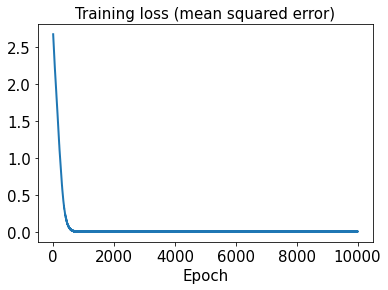

In [68]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

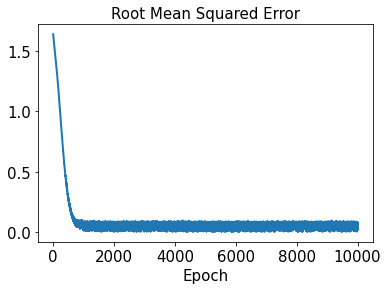

In [69]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [70]:
test_results2 = sd2.evaluate(x_test2)

1/1 [==============================] - 0s 79ms/step - loss: 1.2065e-05 - rmse: 0.0000e+00


In [71]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [72]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [73]:
decoded_train2 = sd2.predict(decoded_sensor_train2)

In [74]:
decoded_test2 = sd2.predict(decoded_sensor_test2)

In [75]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [76]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [77]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.225997683521152


In [78]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.2270688632205459


In [79]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.001522710977197069, 0.5961191564620723, 0.0136057908998336, 0.3537208065899154, 0.11890373730007817, 0.46580644189030923, 0.2268730696956383, 0.009346935974844501, 0.1734956415303282, 0.01888264696429729, 0.015710569110381465, 0.3667702669200687, 0.00917289058979453, 0.6309580654641491, 0.39001598987329233, 0.42206859158297255, 0.0029317135200101186, 0.0372001108434812, 0.47506498968646194, 0.006136247882290142, 0.02653774877030746, 0.5287594963605355, 0.02207229407449588, 0.028034019284782698, 0.012496205537960603, 0.42723152053447044, 0.03266041070364789, 0.06202328054723678, 0.04162094965091999, 0.548247161839044, 0.27966833983635353, 0.005125803565232506, 0.0315405240516315]


In [80]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.023038124165434982, 0.31549726593290583, 0.5058105131786059, 0.018251106321453145, 0.5808920880907489, 0.03076055450918177, 0.04594895369818296, 0.03298700640574853]


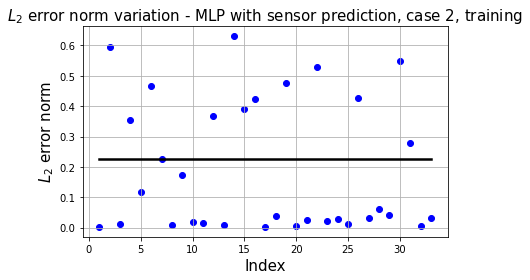

In [130]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

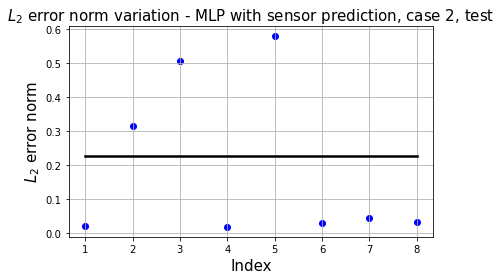

In [131]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

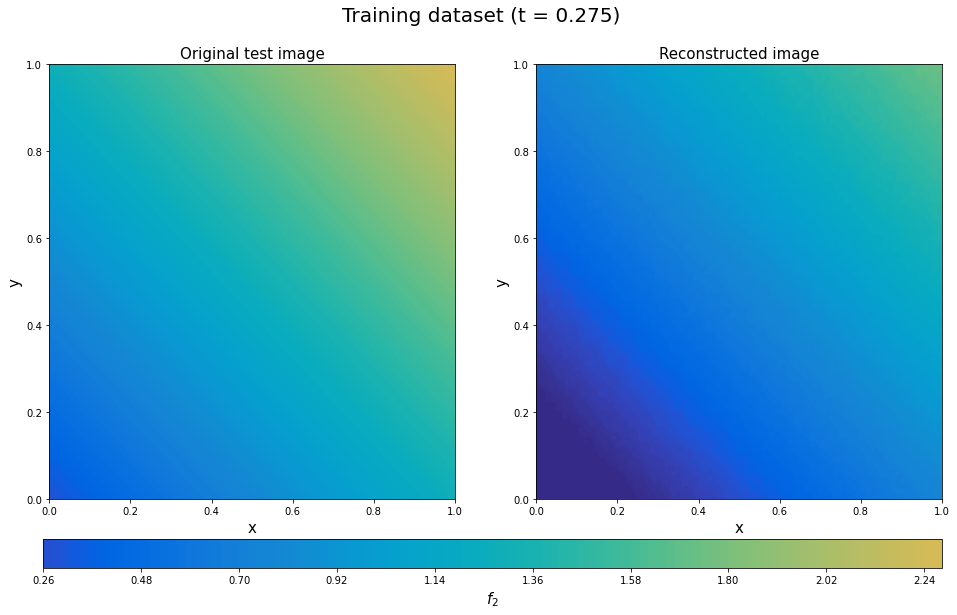

In [83]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

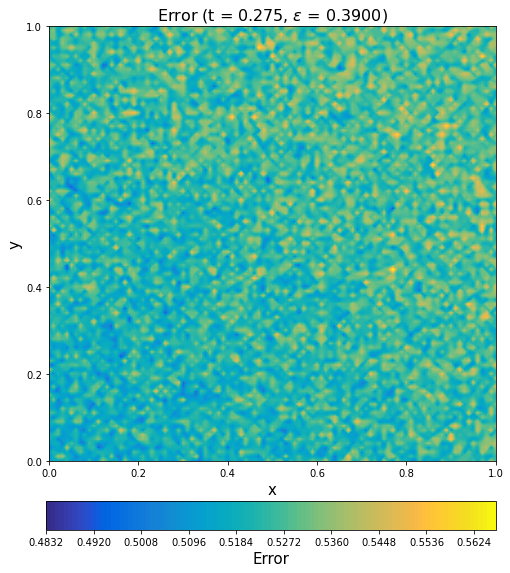

In [84]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

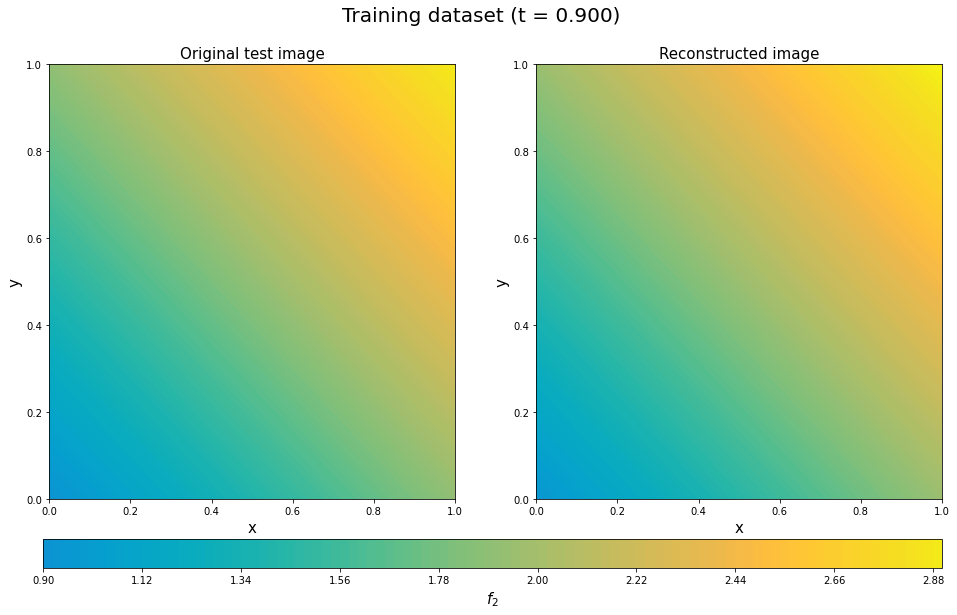

In [85]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

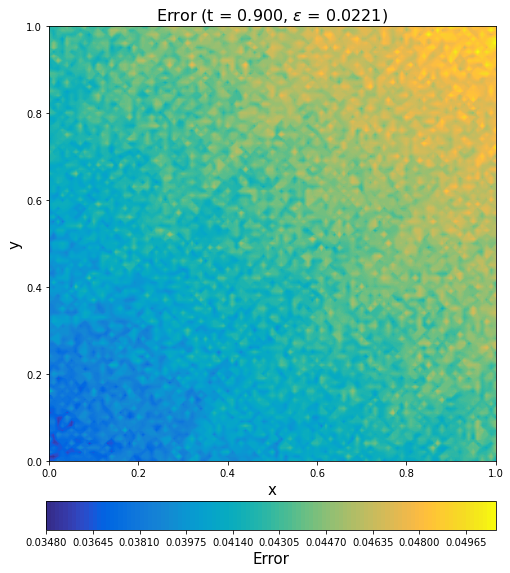

In [86]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

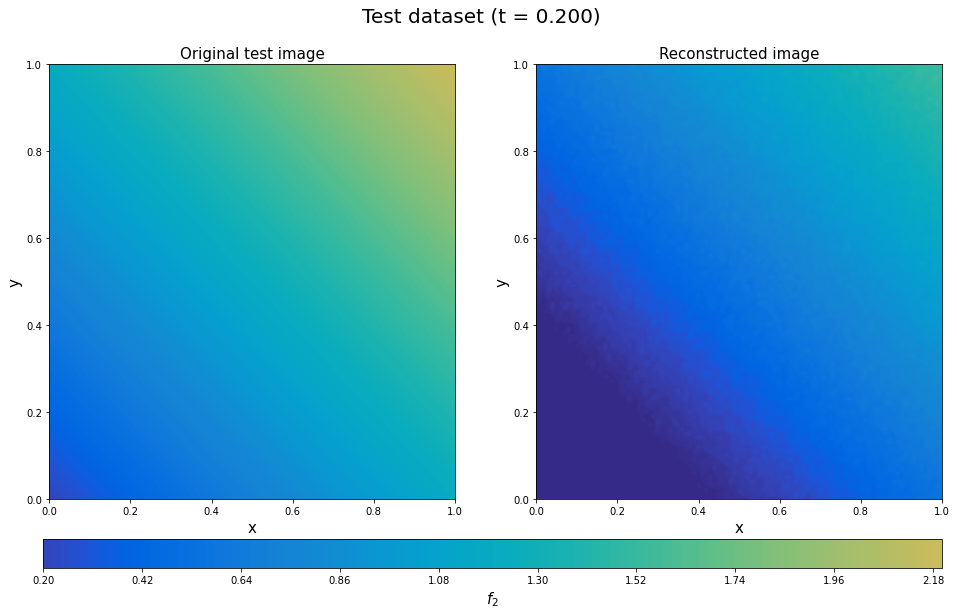

In [87]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

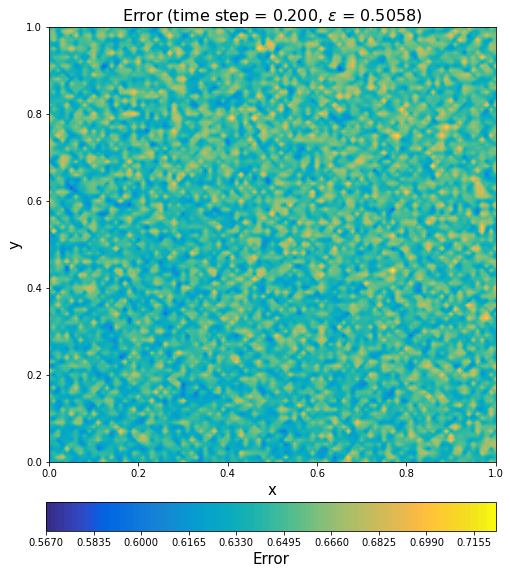

In [88]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

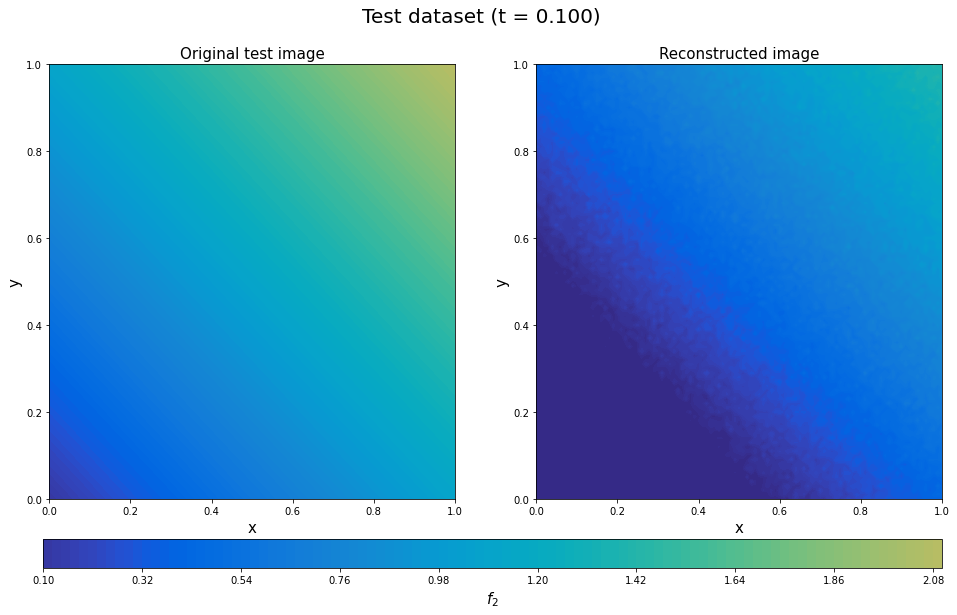

In [89]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

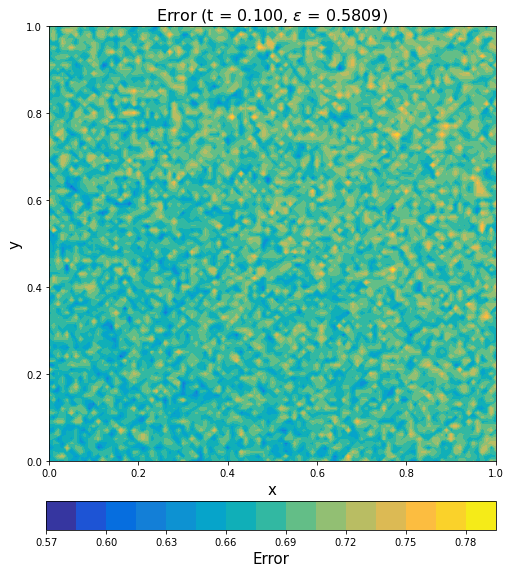

In [90]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [91]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [92]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [93]:
sensor3 = sensor3.reshape((41, 16, 1))

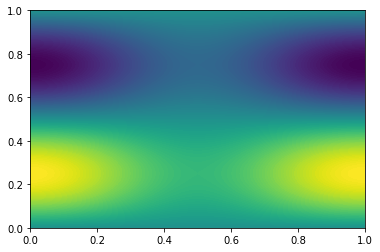

In [94]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [95]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [96]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [97]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [98]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 17ms/step - loss: 3.8367 - rmse: 1.9585
Epoch 2/10000
2/2 [==============================] - 0s 21ms/step - loss: 3.8212 - rmse: 1.9545
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8093 - rmse: 1.9514
Epoch 4/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7975 - rmse: 1.9484
Epoch 5/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.7896 - rmse: 1.9464
Epoch 6/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7811 - rmse: 1.9442
Epoch 7/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.7735 - rmse: 1.9422
Epoch 8/10000
2/2 [==============================] - 0s 22ms/step - loss: 3.7666 - rmse: 1.9405
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7603 - rmse: 1.9388
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7539 - rmse: 1.9372
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 3.1760 - rmse: 1.7818
Epoch 170/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1731 - rmse: 1.7810
Epoch 171/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1697 - rmse: 1.7800
Epoch 172/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1667 - rmse: 1.7792
Epoch 173/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1643 - rmse: 1.7785
Epoch 174/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1609 - rmse: 1.7775
Epoch 175/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1576 - rmse: 1.7766
Epoch 176/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1550 - rmse: 1.7759
Epoch 177/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1522 - rmse: 1.7751
Epoch 178/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1491 - rmse: 1.7742
Epoch 179/10000
2/2 [================

Epoch 253/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9333 - rmse: 1.7123
Epoch 254/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9304 - rmse: 1.7115
Epoch 255/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9281 - rmse: 1.7108
Epoch 256/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9251 - rmse: 1.7100
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9219 - rmse: 1.7090
Epoch 258/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9194 - rmse: 1.7083
Epoch 259/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9165 - rmse: 1.7074
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9147 - rmse: 1.7069
Epoch 261/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9110 - rmse: 1.7058
Epoch 262/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9086 - rmse: 1.7051
Epoch 263/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 2.5227 - rmse: 1.5879
Epoch 420/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5204 - rmse: 1.5872
Epoch 421/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5186 - rmse: 1.5866
Epoch 422/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5159 - rmse: 1.5858
Epoch 423/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5139 - rmse: 1.5851
Epoch 424/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5119 - rmse: 1.5845
Epoch 425/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5097 - rmse: 1.5838
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5076 - rmse: 1.5832
Epoch 427/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5055 - rmse: 1.5825
Epoch 428/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5027 - rmse: 1.5816
Epoch 429/10000
2/2 [================

2/2 [==============================] - 0s 11ms/step - loss: 2.1882 - rmse: 1.4789
Epoch 586/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1860 - rmse: 1.4781
Epoch 587/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1848 - rmse: 1.4777
Epoch 588/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1827 - rmse: 1.4770
Epoch 589/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1809 - rmse: 1.4764
Epoch 590/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1788 - rmse: 1.4757
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1773 - rmse: 1.4752
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1752 - rmse: 1.4744
Epoch 593/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1738 - rmse: 1.4740
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1728 - rmse: 1.4737
Epoch 595/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 1.9074 - rmse: 1.3807
Epoch 752/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9059 - rmse: 1.3801
Epoch 753/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9047 - rmse: 1.3797
Epoch 754/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9033 - rmse: 1.3792
Epoch 755/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9016 - rmse: 1.3785
Epoch 756/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9000 - rmse: 1.3780
Epoch 757/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8992 - rmse: 1.3777
Epoch 758/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8973 - rmse: 1.3770
Epoch 759/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8953 - rmse: 1.3763
Epoch 760/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8937 - rmse: 1.3757
Epoch 761/10000
2/2 [================

2/2 [==============================] - 0s 12ms/step - loss: 1.6694 - rmse: 1.2916
Epoch 918/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6676 - rmse: 1.2909
Epoch 919/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6662 - rmse: 1.2904
Epoch 920/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6656 - rmse: 1.2901
Epoch 921/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6643 - rmse: 1.2896
Epoch 922/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6622 - rmse: 1.2888
Epoch 923/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6620 - rmse: 1.2888
Epoch 924/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6601 - rmse: 1.2880
Epoch 925/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6589 - rmse: 1.2875
Epoch 926/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6578 - rmse: 1.2871
Epoch 927/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.5626 - rmse: 1.2496
Epoch 1002/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5605 - rmse: 1.2488
Epoch 1003/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5591 - rmse: 1.2482
Epoch 1004/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5584 - rmse: 1.2479
Epoch 1005/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5565 - rmse: 1.2471
Epoch 1006/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5552 - rmse: 1.2466
Epoch 1007/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5544 - rmse: 1.2463
Epoch 1008/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5529 - rmse: 1.2457
Epoch 1009/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5518 - rmse: 1.2452
Epoch 1010/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5508 - rmse: 1.2448
Epoch 1011/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 1.3711 - rmse: 1.1704
Epoch 1168/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3693 - rmse: 1.1697
Epoch 1169/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3676 - rmse: 1.1690
Epoch 1170/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3680 - rmse: 1.1691
Epoch 1171/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3658 - rmse: 1.1682
Epoch 1172/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3650 - rmse: 1.1678
Epoch 1173/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3640 - rmse: 1.1674
Epoch 1174/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3625 - rmse: 1.1668
Epoch 1175/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3612 - rmse: 1.1662
Epoch 1176/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3605 - rmse: 1.1659
Epoch 1177/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 1.2051 - rmse: 1.0972
Epoch 1334/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2023 - rmse: 1.0960
Epoch 1335/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2014 - rmse: 1.0956
Epoch 1336/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2018 - rmse: 1.0957
Epoch 1337/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1999 - rmse: 1.0949
Epoch 1338/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1987 - rmse: 1.0943
Epoch 1339/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1975 - rmse: 1.0938
Epoch 1340/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1966 - rmse: 1.0934
Epoch 1341/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1960 - rmse: 1.0931
Epoch 1342/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1964 - rmse: 1.0933
Epoch 1343/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 1.0566 - rmse: 1.0274
Epoch 1500/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0556 - rmse: 1.0269
Epoch 1501/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0547 - rmse: 1.0264
Epoch 1502/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0548 - rmse: 1.0265
Epoch 1503/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0530 - rmse: 1.0256
Epoch 1504/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0530 - rmse: 1.0256
Epoch 1505/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0520 - rmse: 1.0251
Epoch 1506/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0509 - rmse: 1.0246
Epoch 1507/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0506 - rmse: 1.0244
Epoch 1508/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0496 - rmse: 1.0239
Epoch 1509/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.9900 - rmse: 0.9944
Epoch 1583/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9910 - rmse: 0.9949
Epoch 1584/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9887 - rmse: 0.9938
Epoch 1585/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9877 - rmse: 0.9933
Epoch 1586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9876 - rmse: 0.9932
Epoch 1587/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9865 - rmse: 0.9927
Epoch 1588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9860 - rmse: 0.9924
Epoch 1589/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.9846 - rmse: 0.9917
Epoch 1590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9843 - rmse: 0.9916
Epoch 1591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9833 - rmse: 0.9911
Epoch 1592/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.9258 - rmse: 0.9616
Epoch 1666/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9259 - rmse: 0.9617
Epoch 1667/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.9244 - rmse: 0.9609
Epoch 1668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9231 - rmse: 0.9602
Epoch 1669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9218 - rmse: 0.9595
Epoch 1670/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9214 - rmse: 0.9593
Epoch 1671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9211 - rmse: 0.9592
Epoch 1672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9200 - rmse: 0.9586
Epoch 1673/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.9197 - rmse: 0.9584
Epoch 1674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9188 - rmse: 0.9580
Epoch 1675/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.8624 - rmse: 0.9281
Epoch 1749/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8619 - rmse: 0.9278
Epoch 1750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8636 - rmse: 0.9287
Epoch 1751/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8601 - rmse: 0.9268
Epoch 1752/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8602 - rmse: 0.9269
Epoch 1753/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8596 - rmse: 0.9265
Epoch 1754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8579 - rmse: 0.9257
Epoch 1755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8584 - rmse: 0.9259
Epoch 1756/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8565 - rmse: 0.9249
Epoch 1757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8560 - rmse: 0.9246
Epoch 1758/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.8047 - rmse: 0.8964
Epoch 1832/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8063 - rmse: 0.8973
Epoch 1833/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8042 - rmse: 0.8961
Epoch 1834/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8035 - rmse: 0.8958
Epoch 1835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8029 - rmse: 0.8954
Epoch 1836/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8010 - rmse: 0.8944
Epoch 1837/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8005 - rmse: 0.8941
Epoch 1838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8008 - rmse: 0.8943
Epoch 1839/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7998 - rmse: 0.8937
Epoch 1840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7985 - rmse: 0.8930
Epoch 1841/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.7476 - rmse: 0.8640
Epoch 1915/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7470 - rmse: 0.8636
Epoch 1916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7464 - rmse: 0.8633
Epoch 1917/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7461 - rmse: 0.8632
Epoch 1918/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7462 - rmse: 0.8632
Epoch 1919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7445 - rmse: 0.8622
Epoch 1920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7469 - rmse: 0.8636
Epoch 1921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7437 - rmse: 0.8617
Epoch 1922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7436 - rmse: 0.8617
Epoch 1923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7417 - rmse: 0.8606
Epoch 1924/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.6939 - rmse: 0.8324
Epoch 1998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6922 - rmse: 0.8313
Epoch 1999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6911 - rmse: 0.8307
Epoch 2000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6905 - rmse: 0.8303
Epoch 2001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6898 - rmse: 0.8299
Epoch 2002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6892 - rmse: 0.8295
Epoch 2003/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6885 - rmse: 0.8291
Epoch 2004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6879 - rmse: 0.8287
Epoch 2005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6879 - rmse: 0.8287
Epoch 2006/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6867 - rmse: 0.8280
Epoch 2007/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.6385 - rmse: 0.7984
Epoch 2081/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6375 - rmse: 0.7978
Epoch 2082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6383 - rmse: 0.7983
Epoch 2083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6367 - rmse: 0.7973
Epoch 2084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6393 - rmse: 0.7989
Epoch 2085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6349 - rmse: 0.7962
Epoch 2086/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6358 - rmse: 0.7967
Epoch 2087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6338 - rmse: 0.7954
Epoch 2088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6362 - rmse: 0.7970
Epoch 2089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6333 - rmse: 0.7951
Epoch 2090/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.5862 - rmse: 0.7650
Epoch 2164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5891 - rmse: 0.7668
Epoch 2165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5868 - rmse: 0.7653
Epoch 2166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5845 - rmse: 0.7639
Epoch 2167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5847 - rmse: 0.7640
Epoch 2168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5842 - rmse: 0.7636
Epoch 2169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5827 - rmse: 0.7627
Epoch 2170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5825 - rmse: 0.7625
Epoch 2171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5819 - rmse: 0.7622
Epoch 2172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5818 - rmse: 0.7621
Epoch 2173/10000
2/2 [=======

2/2 [==============================] - 0s 12ms/step - loss: 0.5372 - rmse: 0.7322
Epoch 2247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5365 - rmse: 0.7318
Epoch 2248/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5361 - rmse: 0.7315
Epoch 2249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5372 - rmse: 0.7323
Epoch 2250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5352 - rmse: 0.7309
Epoch 2251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5342 - rmse: 0.7302
Epoch 2252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5337 - rmse: 0.7299
Epoch 2253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5332 - rmse: 0.7295
Epoch 2254/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5326 - rmse: 0.7291
Epoch 2255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5320 - rmse: 0.7286
Epoch 2256/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.4930 - rmse: 0.7014
Epoch 2330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4924 - rmse: 0.7010
Epoch 2331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4887 - rmse: 0.6983
Epoch 2332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4883 - rmse: 0.6980
Epoch 2333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4906 - rmse: 0.6997
Epoch 2334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4882 - rmse: 0.6980
Epoch 2335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4866 - rmse: 0.6968
Epoch 2336/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4857 - rmse: 0.6962
Epoch 2337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4856 - rmse: 0.6961
Epoch 2338/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4853 - rmse: 0.6959
Epoch 2339/10000
2/2 [======

Epoch 2412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4457 - rmse: 0.6668
Epoch 2413/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4449 - rmse: 0.6663
Epoch 2414/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4439 - rmse: 0.6655
Epoch 2415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4433 - rmse: 0.6651
Epoch 2416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4444 - rmse: 0.6659
Epoch 2417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4446 - rmse: 0.6660
Epoch 2418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4425 - rmse: 0.6644
Epoch 2419/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4455 - rmse: 0.6667
Epoch 2420/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4411 - rmse: 0.6634
Epoch 2421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4414 - rmse: 0.6636
Epoch 2422/

2/2 [==============================] - 0s 10ms/step - loss: 0.3601 - rmse: 0.5993
Epoch 2578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3627 - rmse: 0.6014
Epoch 2579/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3587 - rmse: 0.5981
Epoch 2580/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3583 - rmse: 0.5978
Epoch 2581/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3578 - rmse: 0.5973
Epoch 2582/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3572 - rmse: 0.5969
Epoch 2583/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3574 - rmse: 0.5970
Epoch 2584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3579 - rmse: 0.5974
Epoch 2585/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3599 - rmse: 0.5991
Epoch 2586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3568 - rmse: 0.5965
Epoch 2587/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.3235 - rmse: 0.5679
Epoch 2661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3218 - rmse: 0.5664
Epoch 2662/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3204 - rmse: 0.5652
Epoch 2663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3255 - rmse: 0.5696
Epoch 2664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3204 - rmse: 0.5652
Epoch 2665/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3225 - rmse: 0.5670
Epoch 2666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3201 - rmse: 0.5649
Epoch 2667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3185 - rmse: 0.5635
Epoch 2668/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3180 - rmse: 0.5631
Epoch 2669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3170 - rmse: 0.5621
Epoch 2670/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.2871 - rmse: 0.5349
Epoch 2744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2867 - rmse: 0.5345
Epoch 2745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2839 - rmse: 0.5319
Epoch 2746/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2857 - rmse: 0.5336
Epoch 2747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2840 - rmse: 0.5320
Epoch 2748/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2827 - rmse: 0.5308
Epoch 2749/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2832 - rmse: 0.5313
Epoch 2750/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2820 - rmse: 0.5301
Epoch 2751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2820 - rmse: 0.5301
Epoch 2752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2849 - rmse: 0.5329
Epoch 2753/10000
2/2 [======

Epoch 2826/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2522 - rmse: 0.5013
Epoch 2827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2518 - rmse: 0.5009
Epoch 2828/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2516 - rmse: 0.5007
Epoch 2829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2512 - rmse: 0.5002
Epoch 2830/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2561 - rmse: 0.5051
Epoch 2831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2524 - rmse: 0.5015
Epoch 2832/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2527 - rmse: 0.5018
Epoch 2833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2519 - rmse: 0.5010
Epoch 2834/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2515 - rmse: 0.5006
Epoch 2835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2489 - rmse: 0.4980
Epoch 2836

2/2 [==============================] - 0s 11ms/step - loss: 0.1964 - rmse: 0.4422
Epoch 2992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2004 - rmse: 0.4466
Epoch 2993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1951 - rmse: 0.4407
Epoch 2994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1964 - rmse: 0.4422
Epoch 2995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1966 - rmse: 0.4424
Epoch 2996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1943 - rmse: 0.4398
Epoch 2997/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1954 - rmse: 0.4410
Epoch 2998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1935 - rmse: 0.4388
Epoch 2999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1981 - rmse: 0.4441
Epoch 3000/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1950 - rmse: 0.4406
Epoch 3001/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.1724 - rmse: 0.4141
Epoch 3075/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1692 - rmse: 0.4102
Epoch 3076/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1698 - rmse: 0.4110
Epoch 3077/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1717 - rmse: 0.4132
Epoch 3078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1734 - rmse: 0.4153
Epoch 3079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1687 - rmse: 0.4097
Epoch 3080/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1728 - rmse: 0.4146
Epoch 3081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1705 - rmse: 0.4118
Epoch 3082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1722 - rmse: 0.4139
Epoch 3083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1684 - rmse: 0.4093
Epoch 3084/10000
2/2 [=====

Epoch 3157/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1482 - rmse: 0.3838
Epoch 3158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1466 - rmse: 0.3817
Epoch 3159/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1487 - rmse: 0.3845
Epoch 3160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1459 - rmse: 0.3808
Epoch 3161/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1475 - rmse: 0.3829
Epoch 3162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1485 - rmse: 0.3843
Epoch 3163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1480 - rmse: 0.3835
Epoch 3164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1450 - rmse: 0.3796
Epoch 3165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1470 - rmse: 0.3822
Epoch 3166/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1470 - rmse: 0.3822
Epoch 3167

2/2 [==============================] - 0s 10ms/step - loss: 0.1102 - rmse: 0.3307
Epoch 3323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1089 - rmse: 0.3288
Epoch 3324/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1098 - rmse: 0.3301
Epoch 3325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1120 - rmse: 0.3334
Epoch 3326/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1097 - rmse: 0.3299
Epoch 3327/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1108 - rmse: 0.3316
Epoch 3328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1114 - rmse: 0.3325
Epoch 3329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1107 - rmse: 0.3314
Epoch 3330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1082 - rmse: 0.3277
Epoch 3331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1073 - rmse: 0.3262
Epoch 3332/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0935 - rmse: 0.3045
Epoch 3406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1007 - rmse: 0.3160
Epoch 3407/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0931 - rmse: 0.3038
Epoch 3408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0934 - rmse: 0.3043
Epoch 3409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0935 - rmse: 0.3043
Epoch 3410/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0924 - rmse: 0.3026
Epoch 3411/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0997 - rmse: 0.3145
Epoch 3412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0922 - rmse: 0.3023
Epoch 3413/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0918 - rmse: 0.3016
Epoch 3414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0915 - rmse: 0.3012
Epoch 3415/10000
2/2 [=====

Epoch 3488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0820 - rmse: 0.2850
Epoch 3489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0801 - rmse: 0.2816
Epoch 3490/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0794 - rmse: 0.2804
Epoch 3491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0802 - rmse: 0.2817
Epoch 3492/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0790 - rmse: 0.2796
Epoch 3493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0789 - rmse: 0.2794
Epoch 3494/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0853 - rmse: 0.2907
Epoch 3495/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0842 - rmse: 0.2888
Epoch 3496/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0812 - rmse: 0.2835
Epoch 3497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0808 - rmse: 0.2828
Epoch 3498/

2/2 [==============================] - 0s 11ms/step - loss: 0.0587 - rmse: 0.2408
Epoch 3654/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0573 - rmse: 0.2376
Epoch 3655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0590 - rmse: 0.2414
Epoch 3656/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0568 - rmse: 0.2368
Epoch 3657/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0574 - rmse: 0.2379
Epoch 3658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0559 - rmse: 0.2348
Epoch 3659/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0557 - rmse: 0.2343
Epoch 3660/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0567 - rmse: 0.2365
Epoch 3661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0557 - rmse: 0.2344
Epoch 3662/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0559 - rmse: 0.2348
Epoch 3663/10000
2/2 [=====

Epoch 3736/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0471 - rmse: 0.2151
Epoch 3737/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0478 - rmse: 0.2168
Epoch 3738/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0547 - rmse: 0.2323
Epoch 3739/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0478 - rmse: 0.2168
Epoch 3740/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0493 - rmse: 0.2203
Epoch 3741/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0466 - rmse: 0.2141
Epoch 3742/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0480 - rmse: 0.2173
Epoch 3743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0488 - rmse: 0.2191
Epoch 3744/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0474 - rmse: 0.2160
Epoch 3745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0483 - rmse: 0.2180
Epoch 3746/1

Epoch 3901/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0328 - rmse: 0.1791
Epoch 3902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0330 - rmse: 0.1797
Epoch 3903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0336 - rmse: 0.1813
Epoch 3904/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0352 - rmse: 0.1858
Epoch 3905/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0344 - rmse: 0.1835
Epoch 3906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0363 - rmse: 0.1885
Epoch 3907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0384 - rmse: 0.1940
Epoch 3908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - rmse: 0.1852
Epoch 3909/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0326 - rmse: 0.1784
Epoch 3910/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0325 - rmse: 0.1782
Epoch 3911/

Epoch 4066/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0228 - rmse: 0.1486
Epoch 4067/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0254 - rmse: 0.1571
Epoch 4068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0256 - rmse: 0.1579
Epoch 4069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0227 - rmse: 0.1483
Epoch 4070/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0250 - rmse: 0.1558
Epoch 4071/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0263 - rmse: 0.1600
Epoch 4072/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0238 - rmse: 0.1520
Epoch 4073/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0231 - rmse: 0.1498
Epoch 4074/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0235 - rmse: 0.1508
Epoch 4075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0235 - rmse: 0.1508
Epoch 4076/

Epoch 4231/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0180 - rmse: 0.1315
Epoch 4232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0193 - rmse: 0.1366
Epoch 4233/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0165 - rmse: 0.1259
Epoch 4234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0218 - rmse: 0.1454
Epoch 4235/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0156 - rmse: 0.1223
Epoch 4236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0158 - rmse: 0.1228
Epoch 4237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.1257
Epoch 4238/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0165 - rmse: 0.1256
Epoch 4239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0216 - rmse: 0.1446
Epoch 4240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0167 - rmse: 0.1265
Epoch 4241/

2/2 [==============================] - 0s 10ms/step - loss: 0.0155 - rmse: 0.1220
Epoch 4397/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0155 - rmse: 0.1219
Epoch 4398/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0187 - rmse: 0.1342
Epoch 4399/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0119 - rmse: 0.1062
Epoch 4400/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0176 - rmse: 0.1303
Epoch 4401/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0186 - rmse: 0.1338
Epoch 4402/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0131 - rmse: 0.1115
Epoch 4403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0151 - rmse: 0.1204
Epoch 4404/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0148 - rmse: 0.1189
Epoch 4405/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0139 - rmse: 0.1150
Epoch 4406/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.1278
Epoch 4480/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0180 - rmse: 0.1317
Epoch 4481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.1039
Epoch 4482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0962
Epoch 4483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - rmse: 0.0959
Epoch 4484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.1017
Epoch 4485/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - rmse: 0.1029
Epoch 4486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0955
Epoch 4487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0968
Epoch 4488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.1075
Epoch 4489/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.1009
Epoch 4563/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - rmse: 0.0960
Epoch 4564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0122 - rmse: 0.1077
Epoch 4565/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.1007
Epoch 4566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.1047
Epoch 4567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0872
Epoch 4568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0918
Epoch 4569/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - rmse: 0.1032
Epoch 4570/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0989
Epoch 4571/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0950
Epoch 4572/10000
2/2 [======

Epoch 4645/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0841
Epoch 4646/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0129 - rmse: 0.1106
Epoch 4647/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0091 - rmse: 0.0919
Epoch 4648/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0854
Epoch 4649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0853
Epoch 4650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.1001
Epoch 4651/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0915
Epoch 4652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0103 - rmse: 0.0983
Epoch 4653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0900
Epoch 4654/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0867
Epoch 4655/1

2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0948
Epoch 4811/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0918
Epoch 4812/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0733
Epoch 4813/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0931
Epoch 4814/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0824
Epoch 4815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0852
Epoch 4816/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0731
Epoch 4817/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0946
Epoch 4818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0751
Epoch 4819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0851
Epoch 4820/10000
2/2 [=======

Epoch 4893/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0723
Epoch 4894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0896
Epoch 4895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0944
Epoch 4896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0807
Epoch 4897/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0878
Epoch 4898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0893
Epoch 4899/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0771
Epoch 4900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0764
Epoch 4901/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0829
Epoch 4902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.1054
Epoch 4903/

Epoch 5058/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0820
Epoch 5059/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0820
Epoch 5060/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0786
Epoch 5061/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0120 - rmse: 0.1068
Epoch 5062/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0974
Epoch 5063/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0854
Epoch 5064/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0774
Epoch 5065/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0660
Epoch 5066/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0819
Epoch 5067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0853
Epoch 5068/

2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0761
Epoch 5224/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0793
Epoch 5225/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0709
Epoch 5226/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0734
Epoch 5227/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0635
Epoch 5228/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0740
Epoch 5229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0610
Epoch 5230/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0705
Epoch 5231/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0693
Epoch 5232/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0641
Epoch 5233/10000
2/2 [=====

Epoch 5306/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0842
Epoch 5307/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0620
Epoch 5308/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0825
Epoch 5309/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0728
Epoch 5310/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0702
Epoch 5311/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0612
Epoch 5312/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0705
Epoch 5313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0629
Epoch 5314/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0636
Epoch 5315/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0789
Epoch 5316/1

Epoch 5471/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0606
Epoch 5472/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0770
Epoch 5473/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0683
Epoch 5474/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0581
Epoch 5475/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0588
Epoch 5476/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0935
Epoch 5477/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0806
Epoch 5478/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0752
Epoch 5479/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0718
Epoch 5480/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0805
Epoch 5481

Epoch 5636/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0672
Epoch 5637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0591
Epoch 5638/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0689
Epoch 5639/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0761
Epoch 5640/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0778
Epoch 5641/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0593
Epoch 5642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0741
Epoch 5643/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0645
Epoch 5644/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0656
Epoch 5645/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0568
Epoch 5646/

2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0662
Epoch 5802/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0665
Epoch 5803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0558
Epoch 5804/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0580
Epoch 5805/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0580
Epoch 5806/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0772
Epoch 5807/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0971
Epoch 5808/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0688
Epoch 5809/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 5810/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0661
Epoch 5811/10000
2/2 [=====

Epoch 5884/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0732
Epoch 5885/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0109 - rmse: 0.1021
Epoch 5886/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0120 - rmse: 0.1072
Epoch 5887/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0965
Epoch 5888/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0119 - rmse: 0.1067
Epoch 5889/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0854
Epoch 5890/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0611
Epoch 5891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.1070
Epoch 5892/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0776
Epoch 5893/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0564
Epoch 5894/

Epoch 6049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0543
Epoch 6050/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0645
Epoch 6051/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0645
Epoch 6052/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0793
Epoch 6053/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0550
Epoch 6054/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0699
Epoch 6055/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0812
Epoch 6056/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 6057/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0644
Epoch 6058/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0544
Epoch 6059/

Epoch 6214/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0565
Epoch 6215/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0607
Epoch 6216/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0774
Epoch 6217/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0771
Epoch 6218/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.1005
Epoch 6219/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0735
Epoch 6220/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0680
Epoch 6221/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0904
Epoch 6222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0903
Epoch 6223/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0615
Epoch 6224/1

2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0517
Epoch 6380/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0522
Epoch 6381/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0799
Epoch 6382/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0628
Epoch 6383/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0538
Epoch 6384/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0609
Epoch 6385/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0515
Epoch 6386/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0723
Epoch 6387/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0515
Epoch 6388/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0894
Epoch 6389/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0815
Epoch 6463/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0621
Epoch 6464/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0621
Epoch 6465/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0944
Epoch 6466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0546
Epoch 6467/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0661
Epoch 6468/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0606
Epoch 6469/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.1048
Epoch 6470/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0516
Epoch 6471/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0535
Epoch 6472/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0714
Epoch 6546/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0601
Epoch 6547/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0591
Epoch 6548/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0512
Epoch 6549/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0532
Epoch 6550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0756
Epoch 6551/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0617
Epoch 6552/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0735
Epoch 6553/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0792
Epoch 6554/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0658
Epoch 6555/10000
2/2 [=====

Epoch 6628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0713
Epoch 6629/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0693
Epoch 6630/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0733
Epoch 6631/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0694
Epoch 6632/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0618
Epoch 6633/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0636
Epoch 6634/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0539
Epoch 6635/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0510
Epoch 6636/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0589
Epoch 6637/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0792
Epoch 6638/100

2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0715
Epoch 6794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0615
Epoch 6795/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0102 - rmse: 0.0990
Epoch 6796/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0516
Epoch 6797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0641
Epoch 6798/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0584
Epoch 6799/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0791
Epoch 6800/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0113 - rmse: 0.1041
Epoch 6801/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0524
Epoch 6802/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0728
Epoch 6803/10000
2/2 [=====

Epoch 6958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0597
Epoch 6959/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0739
Epoch 6960/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0719
Epoch 6961/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0100 - rmse: 0.0980
Epoch 6962/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0583
Epoch 6963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0628
Epoch 6964/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0658
Epoch 6965/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0678
Epoch 6966/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0497
Epoch 6967/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0741
Epoch 6968/

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0563
Epoch 7124/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0871
Epoch 7125/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0489
Epoch 7126/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0734
Epoch 7127/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0613
Epoch 7128/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 7129/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0927
Epoch 7130/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0487
Epoch 7131/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0694
Epoch 7132/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0481
Epoch 7133/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0788
Epoch 7207/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0616
Epoch 7208/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0788
Epoch 7209/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0531
Epoch 7210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0647
Epoch 7211/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0584
Epoch 7212/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0494
Epoch 7213/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0768
Epoch 7214/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0569
Epoch 7215/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0667
Epoch 7216/10000
2/2 [======

Epoch 7289/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0670
Epoch 7290/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.1033
Epoch 7291/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0792
Epoch 7292/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0478
Epoch 7293/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0499
Epoch 7294/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0791
Epoch 7295/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0612
Epoch 7296/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0692
Epoch 7297/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0592
Epoch 7298/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0592
Epoch 7299/1

Epoch 7454/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0979
Epoch 7455/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0738
Epoch 7456/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0564
Epoch 7457/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0477
Epoch 7458/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0476
Epoch 7459/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0112 - rmse: 0.1038
Epoch 7460/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0492
Epoch 7461/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0756
Epoch 7462/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0616
Epoch 7463/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0596
Epoch 7464

Epoch 7619/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0467
Epoch 7620/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0537
Epoch 7621/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0465
Epoch 7622/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 7623/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0724
Epoch 7624/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0481
Epoch 7625/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0596
Epoch 7626/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0781
Epoch 7627/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0577
Epoch 7628/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0459
Epoch 7629

Epoch 7784/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0614
Epoch 7785/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0581
Epoch 7786/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0485
Epoch 7787/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0458
Epoch 7788/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0462
Epoch 7789/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0971
Epoch 7790/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0681
Epoch 7791/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0607
Epoch 7792/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0578
Epoch 7793/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0913
Epoch 7794/1

Epoch 7949/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0695
Epoch 7950/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0568
Epoch 7951/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0540
Epoch 7952/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0460
Epoch 7953/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0757
Epoch 7954/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0601
Epoch 7955/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0674
Epoch 7956/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0087 - rmse: 0.0912
Epoch 7957/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0761
Epoch 7958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0614
Epoch 7959/

Epoch 8114/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0847
Epoch 8115/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0634
Epoch 8116/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0570
Epoch 8117/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0844
Epoch 8118/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0741
Epoch 8119/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0699
Epoch 8120/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 8121/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0546
Epoch 8122/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0591
Epoch 8123/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0899
Epoch 8124/1

Epoch 8279/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0568
Epoch 8280/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0718
Epoch 8281/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0700
Epoch 8282/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 8283/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 8284/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 8285/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0744
Epoch 8286/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0415
Epoch 8287/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0456
Epoch 8288/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0610
Epoch 8289/1

Epoch 8444/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 8445/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0675
Epoch 8446/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0568
Epoch 8447/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0676
Epoch 8448/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0421
Epoch 8449/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0954
Epoch 8450/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.1010
Epoch 8451/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 8452/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 8453/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0426
Epoch 8454/10

2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0948
Epoch 8610/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0402
Epoch 8611/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0401
Epoch 8612/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0712
Epoch 8613/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0535
Epoch 8614/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0891
Epoch 8615/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0837
Epoch 8616/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0420
Epoch 8617/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0568
Epoch 8618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 8619/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0641
Epoch 8693/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 8694/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0466
Epoch 8695/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0395
Epoch 8696/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0943
Epoch 8697/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0389
Epoch 8698/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 8699/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 8700/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0731
Epoch 8701/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0616
Epoch 8702/10000
2/2 [======

Epoch 8857/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0486
Epoch 8858/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0589
Epoch 8859/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0409
Epoch 8860/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 8861/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0395
Epoch 8862/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - rmse: 0.1001
Epoch 8863/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0722
Epoch 8864/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0486
Epoch 8865/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0726
Epoch 8866/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0460
Epoch 8867

Epoch 9022/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 9023/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0879
Epoch 9024/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0585
Epoch 9025/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0102 - rmse: 0.0994
Epoch 9026/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0370
Epoch 9027/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0452
Epoch 9028/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0549
Epoch 9029/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0368
Epoch 9030/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 9031/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 9032/

Epoch 9187/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0382
Epoch 9188/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0475
Epoch 9189/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0624
Epoch 9190/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0510
Epoch 9191/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 9192/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0545
Epoch 9193/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0445
Epoch 9194/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0445
Epoch 9195/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0692
Epoch 9196/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0714
Epoch 9197/

2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0818
Epoch 9352/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0818
Epoch 9353/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0585
Epoch 9354/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0494
Epoch 9355/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0989
Epoch 9356/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0646
Epoch 9357/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0506
Epoch 9358/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0506
Epoch 9359/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0713
Epoch 9360/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 9361/10000
2/2 [=======

Epoch 9434/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 9435/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0550
Epoch 9436/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0988
Epoch 9437/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 9438/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0687
Epoch 9439/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0730
Epoch 9440/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0989
Epoch 9441/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0362
Epoch 9442/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0597
Epoch 9443/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0928
Epoch 9444/

Epoch 9599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 9600/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0661
Epoch 9601/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 9602/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0705
Epoch 9603/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 9604/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0705
Epoch 9605/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0353
Epoch 9606/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 9607/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0591
Epoch 9608/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0533
Epoch 9609

Epoch 9764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0613
Epoch 9765/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 9766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0925
Epoch 9767/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0613
Epoch 9768/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0867
Epoch 9769/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0475
Epoch 9770/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0362
Epoch 9771/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 9772/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 9773/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0613
Epoch 9774

Epoch 9929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0445
Epoch 9930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 9931/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 9932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0678
Epoch 9933/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0632
Epoch 9934/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0866
Epoch 9935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0678
Epoch 9936/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 9937/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0864
Epoch 9938/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0469
Epoch 9939/1

In [99]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:58.378900


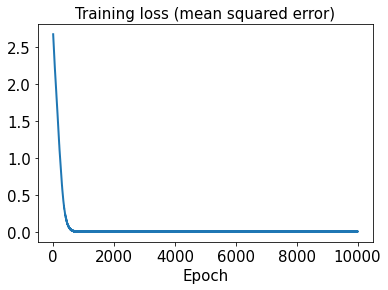

In [100]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

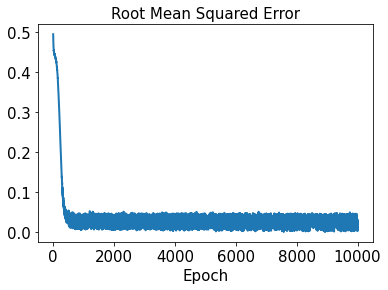

In [101]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [102]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [103]:
start3 = datetime.datetime.now()
history3 = sd3.fit(x_train3, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 17ms/step - loss: 3.8537 - rmse: 1.9631
Epoch 2/10000
2/2 [==============================] - 0s 22ms/step - loss: 3.8330 - rmse: 1.9578
Epoch 3/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.8121 - rmse: 1.9525
Epoch 4/10000
2/2 [==============================] - 0s 51ms/step - loss: 3.7914 - rmse: 1.9472
Epoch 5/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7707 - rmse: 1.9418
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7501 - rmse: 1.9365
Epoch 7/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7296 - rmse: 1.9312
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7092 - rmse: 1.9259
Epoch 9/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6890 - rmse: 1.9207
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6689 - rmse: 1.9154
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.6565 - rmse: 1.2869
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6492 - rmse: 1.2841
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6430 - rmse: 1.2817
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6357 - rmse: 1.2788
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6278 - rmse: 1.2757
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6207 - rmse: 1.2729
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6138 - rmse: 1.2702
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6092 - rmse: 1.2684
Epoch 178/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6026 - rmse: 1.2658
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5953 - rmse: 1.2629
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.8515 - rmse: 0.9226
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8499 - rmse: 0.9217
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8478 - rmse: 0.9206
Epoch 341/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8432 - rmse: 0.9181
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8389 - rmse: 0.9158
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8397 - rmse: 0.9162
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8334 - rmse: 0.9127
Epoch 345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8327 - rmse: 0.9124
Epoch 346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8305 - rmse: 0.9111
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8252 - rmse: 0.9082
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.4585 - rmse: 0.6769
Epoch 507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4590 - rmse: 0.6773
Epoch 508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4572 - rmse: 0.6760
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4536 - rmse: 0.6733
Epoch 510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4507 - rmse: 0.6712
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4492 - rmse: 0.6700
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4501 - rmse: 0.6707
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4484 - rmse: 0.6694
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4453 - rmse: 0.6672
Epoch 515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4411 - rmse: 0.6640
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 13ms/step - loss: 0.2302 - rmse: 0.4796
Epoch 675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2283 - rmse: 0.4777
Epoch 676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2297 - rmse: 0.4791
Epoch 677/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2283 - rmse: 0.4777
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2241 - rmse: 0.4732
Epoch 679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2256 - rmse: 0.4748
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2219 - rmse: 0.4709
Epoch 681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2216 - rmse: 0.4706
Epoch 682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2199 - rmse: 0.4688
Epoch 683/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2186 - rmse: 0.4674
Epoch 684/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1061 - rmse: 0.3256
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0962 - rmse: 0.3099
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0956 - rmse: 0.3090
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1018 - rmse: 0.3190
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0944 - rmse: 0.3070
Epoch 847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0975 - rmse: 0.3120
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0935 - rmse: 0.3057
Epoch 849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0960 - rmse: 0.3097
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0932 - rmse: 0.3052
Epoch 851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0960 - rmse: 0.3097
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - rmse: 0.1883
Epoch 1011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0354 - rmse: 0.1879
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0344 - rmse: 0.1853
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0337 - rmse: 0.1832
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0348 - rmse: 0.1864
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0372 - rmse: 0.1926
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0328 - rmse: 0.1809
Epoch 1017/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0371 - rmse: 0.1924
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0328 - rmse: 0.1808
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0343 - rmse: 0.1850
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 1177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 1179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0165 - rmse: 0.1281
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1005
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0954
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.1096
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.1214
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 1346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 1350/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 1351/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 1509/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.3722e-04 - rmse: 0.0281
Epoch 1510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 1512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 1514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 1515/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1517/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 1518/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 1673/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0609e-04 - rmse: 0.0127
Epoch 1674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 1675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1678/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7961e-04 - rmse: 0.0183
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4705e-04 - rmse: 0.0142
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 1682/10000
2/2 [==

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 1837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 1838/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6521e-04 - rmse: 0.0229
Epoch 1839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 1840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4779e-04 - rmse: 0.0175
Epoch 1842/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 1843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0912
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 1846/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 2001/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0182e-04 - rmse: 0.0258
Epoch 2002/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 2003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 2004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 2006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 2007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0530
Epoch 2010/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 2165/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8259e-04 - rmse: 0.0157
Epoch 2166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 2168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 2169/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7737e-04 - rmse: 0.0307
Epoch 2170/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1380e-04 - rmse: 0.0089
Epoch 2171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 2172/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8221e-04 - rmse: 0.0291
Epoch 2173/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0701e-04 - rmse: 0.0217
Epoch 2174/10000


2/2 [==============================] - 0s 7ms/step - loss: 2.3839e-04 - rmse: 0.0143
Epoch 2329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 2330/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 2331/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 2332/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0853e-04 - rmse: 0.0218
Epoch 2333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 2334/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0998e-04 - rmse: 0.0219
Epoch 2335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 2336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 2337/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 2338/10000
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 2493/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 2494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 2495/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.3166e-04 - rmse: 0.0245
Epoch 2496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 2497/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 2498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 2499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 2500/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3056e-04 - rmse: 0.0100
Epoch 2501/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5437e-04 - rmse: 0.0150
Epoch 2502/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 2657/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9763e-04 - rmse: 0.0131
Epoch 2658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 2659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0907
Epoch 2660/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2644e-04 - rmse: 0.0200
Epoch 2661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 2662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 2663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 2664/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9382e-04 - rmse: 0.0192
Epoch 2665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 2666/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 2821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 2822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 2823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 2824/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 2827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 2828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2830/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 5.7514e-04 - rmse: 0.0235
Epoch 2986/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2503e-04 - rmse: 0.0201
Epoch 2987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 2988/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0673e-04 - rmse: 0.0280
Epoch 2989/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1214e-04 - rmse: 0.0263
Epoch 2990/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 2991/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2276e-04 - rmse: 0.0283
Epoch 2992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 2993/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0380e-04 - rmse: 0.0280
Epoch 2994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 2995/10

2/2 [==============================] - 0s 7ms/step - loss: 3.6305e-04 - rmse: 0.0185
Epoch 3150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 3151/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1175e-04 - rmse: 0.0095
Epoch 3152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 3154/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5134e-04 - rmse: 0.0114
Epoch 3155/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4905e-04 - rmse: 0.0151
Epoch 3156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 3157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 3158/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 3159/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 3315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 3316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 3317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 3318/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 3319/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6065e-04 - rmse: 0.0155
Epoch 3320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 3321/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3527e-04 - rmse: 0.0178
Epoch 3322/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2464e-05 - rmse: 0.0066
Epoch 3323/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 3324/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 3480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 3481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 3483/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 3484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 3485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3486/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 3487/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1401e-04 - rmse: 0.0264
Epoch 3488/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 3489/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 3644/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 3645/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8640e-04 - rmse: 0.0239
Epoch 3646/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4330e-04 - rmse: 0.0250
Epoch 3647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 3648/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8347e-04 - rmse: 0.0191
Epoch 3649/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 3650/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8757e-04 - rmse: 0.0239
Epoch 3651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 3652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 3653/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 4.3736e-04 - rmse: 0.0205
Epoch 3726/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3727/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9314e-04 - rmse: 0.0218
Epoch 3728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 3729/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 3730/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9748e-04 - rmse: 0.0135
Epoch 3731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 3732/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 3733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 3734/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4214e-04 - rmse: 0.0150
Epoch 3735/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 3.5492e-05 - rmse: 0.0044
Epoch 3890/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 3891/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5709e-04 - rmse: 0.0272
Epoch 3892/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6455e-05 - rmse: 0.0090
Epoch 3893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 3894/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7447e-04 - rmse: 0.0310
Epoch 3895/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 3897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 3898/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0467e-04 - rmse: 0.0094
Epoch 3899/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 4055/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 4056/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 4057/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 4058/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 4059/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 4060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 4061/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 4062/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2492e-04 - rmse: 0.0247
Epoch 4063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 4064/10000
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 4219/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.6975e-04 - rmse: 0.0275
Epoch 4220/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 4221/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 4222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 4223/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5436e-04 - rmse: 0.0290
Epoch 4224/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4225/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 4226/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3576e-04 - rmse: 0.0304
Epoch 4227/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 4228/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 4383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0961
Epoch 4385/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8215e-04 - rmse: 0.0130
Epoch 4386/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 4387/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 4388/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5540e-04 - rmse: 0.0185
Epoch 4389/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0799e-04 - rmse: 0.0097
Epoch 4390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 4391/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2225e-05 - rmse: 0.0062
Epoch 4392/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 4547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 4548/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 4549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 4550/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 4551/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 4552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 4553/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4555/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 4556/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4711/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 4712/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 4713/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 4714/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 4715/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4716/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 4718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 4719/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 4720/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 4875/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 4876/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9843e-04 - rmse: 0.0298
Epoch 4877/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 4878/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 4879/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 4880/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 4881/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 4882/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 4883/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 4884/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 2.9939e-04 - rmse: 0.0169
Epoch 5039/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2644e-04 - rmse: 0.0248
Epoch 5040/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9909e-04 - rmse: 0.0314
Epoch 5041/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 5042/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 5043/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 5044/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 5045/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 5046/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 5047/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6418e-04 - rmse: 0.0213
Epoch 5048/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 4.7108e-04 - rmse: 0.0214
Epoch 5203/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5204/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4606e-04 - rmse: 0.0208
Epoch 5205/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 5206/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3373e-04 - rmse: 0.0179
Epoch 5207/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4087e-04 - rmse: 0.0207
Epoch 5208/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5209/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 5210/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 5211/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 5212/10

2/2 [==============================] - 0s 12ms/step - loss: 4.9855e-05 - rmse: 0.0061
Epoch 5367/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0866e-05 - rmse: 0.0043
Epoch 5368/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5369/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0840e-04 - rmse: 0.0172
Epoch 5370/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9170e-04 - rmse: 0.0313
Epoch 5371/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2004e-05 - rmse: 0.0055
Epoch 5372/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2847e-04 - rmse: 0.0108
Epoch 5373/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 5374/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 5375/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0541
Epo

2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5531/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5532/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 5533/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5534/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 5535/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5536/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7148e-04 - rmse: 0.0214
Epoch 5537/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 5538/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4558e-04 - rmse: 0.0153
Epoch 5539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 5540/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 5695/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 5696/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 5697/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5748e-04 - rmse: 0.0121
Epoch 5698/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 5699/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 5700/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 5701/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 5702/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 5703/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 5704/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 5859/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 5860/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3598e-04 - rmse: 0.0180
Epoch 5861/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 5862/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 5863/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 5864/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 5865/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1564e-05 - rmse: 0.0090
Epoch 5866/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5867/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 5868/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6023/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 6024/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 6025/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 6026/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6027/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9510e-04 - rmse: 0.0314
Epoch 6028/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0943e-04 - rmse: 0.0099
Epoch 6029/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 6030/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1067e-05 - rmse: 0.0045
Epoch 6031/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 6032/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6187/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 6188/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6189/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 6190/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 6191/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6628e-05 - rmse: 0.0081
Epoch 6192/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6193/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1685e-04 - rmse: 0.0143
Epoch 6194/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6195/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 6196/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 6351/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 6352/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0304e-04 - rmse: 0.0281
Epoch 6353/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5764e-04 - rmse: 0.0308
Epoch 6354/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 6355/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 6356/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6357/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6358/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1867e-04 - rmse: 0.0175
Epoch 6359/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 6360/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 6515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 6516/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6425e-04 - rmse: 0.0159
Epoch 6517/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 6518/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9998e-04 - rmse: 0.0170
Epoch 6519/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0779e-05 - rmse: 0.0045
Epoch 6520/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 6521/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 6522/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 6523/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8940e-04 - rmse: 0.0167
Epoch 6524/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 6680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 6681/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6396e-04 - rmse: 0.0275
Epoch 6682/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0697e-04 - rmse: 0.0223
Epoch 6683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6684/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2854e-04 - rmse: 0.0268
Epoch 6685/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 6686/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 6687/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 6688/10000
2/2 [===

Epoch 6843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 6844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 6845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 6846/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2991e-04 - rmse: 0.0286
Epoch 6847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 6849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 6850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 6851/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0405e-04 - rmse: 0.0263
Epoch 6852/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6602e-04 - rmse: 0.0256
Epoch 68

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 7008/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 7009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7010/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6775e-04 - rmse: 0.0161
Epoch 7011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 7012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7013/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1136e-04 - rmse: 0.0101
Epoch 7014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7015/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4882e-04 - rmse: 0.0232
Epoch 7016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 7017/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 7173/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0998e-04 - rmse: 0.0142
Epoch 7174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6785e-04 - rmse: 0.0126
Epoch 7175/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7671e-04 - rmse: 0.0192
Epoch 7176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7178/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9850e-04 - rmse: 0.0298
Epoch 7179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 7180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 7181/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 7337/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0423e-04 - rmse: 0.0199
Epoch 7338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 7339/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9257e-04 - rmse: 0.0220
Epoch 7340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 7341/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6818e-04 - rmse: 0.0257
Epoch 7342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7343/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0380e-04 - rmse: 0.0264
Epoch 7344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7345/10000
2/2 

2/2 [==============================] - 0s 12ms/step - loss: 3.1584e-04 - rmse: 0.0175
Epoch 7500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 7501/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1180e-04 - rmse: 0.0245
Epoch 7502/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6794e-04 - rmse: 0.0189
Epoch 7503/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6570e-04 - rmse: 0.0189
Epoch 7504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 7505/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9157e-04 - rmse: 0.0168
Epoch 7506/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 7507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7508/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1220e-04 - rmse: 0.0224
Epoch 7509/

2/2 [==============================] - 0s 11ms/step - loss: 4.5864e-04 - rmse: 0.0212
Epoch 7664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 7665/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9058e-04 - rmse: 0.0219
Epoch 7666/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2679e-04 - rmse: 0.0204
Epoch 7667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 7668/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 7669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 7671/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2868e-04 - rmse: 0.0205
Epoch 7672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 7673/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7748/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2613e-04 - rmse: 0.0178
Epoch 7749/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2823e-04 - rmse: 0.0148
Epoch 7750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 7751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 7752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 7753/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5968e-04 - rmse: 0.0292
Epoch 7754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 7755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7756/10000
2/2 [===

Epoch 7911/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0695e-04 - rmse: 0.0300
Epoch 7912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 7913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 7914/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8475e-04 - rmse: 0.0260
Epoch 7915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 7916/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2686e-04 - rmse: 0.0303
Epoch 7917/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3616e-04 - rmse: 0.0305
Epoch 7918/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4771e-04 - rmse: 0.0253
Epoch 7919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 7920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0494


2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 8076/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3253e-04 - rmse: 0.0180
Epoch 8077/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3865e-04 - rmse: 0.0152
Epoch 8078/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4111e-04 - rmse: 0.0152
Epoch 8079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 8080/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 8081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 8082/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3391e-04 - rmse: 0.0112
Epoch 8083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 8084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 8085/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 8240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 8241/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7181e-04 - rmse: 0.0128
Epoch 8242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 8243/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8453e-05 - rmse: 0.0063
Epoch 8244/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4642e-04 - rmse: 0.0272
Epoch 8245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 8246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 8247/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4749e-04 - rmse: 0.0118
Epoch 8248/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5157e-04 - rmse: 0.0120
Epoch 8249/100

2/2 [==============================] - 0s 8ms/step - loss: 2.8896e-04 - rmse: 0.0167
Epoch 8404/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8804e-04 - rmse: 0.0195
Epoch 8405/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 8408/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8410/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 8411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 8413/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 8569/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8876e-05 - rmse: 0.0071
Epoch 8570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 8571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 8572/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6949e-04 - rmse: 0.0276
Epoch 8573/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0314e-04 - rmse: 0.0097
Epoch 8574/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6854e-05 - rmse: 0.0094
Epoch 8575/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9171e-04 - rmse: 0.0168
Epoch 8576/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0310e-04 - rmse: 0.0140
Epoch 8577/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 8578/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 8733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 8734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 8735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 8736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 8737/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7151e-04 - rmse: 0.0215
Epoch 8738/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8373e-04 - rmse: 0.0194
Epoch 8739/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3983e-04 - rmse: 0.0115
Epoch 8740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 8741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8742/10000
2/2 [===

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 8897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8898/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5221e-04 - rmse: 0.0156
Epoch 8899/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 8900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 8901/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 8902/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4858e-04 - rmse: 0.0155
Epoch 8903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 8904/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 8905/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7563e-04 - rmse: 0.0129
Epoch 8906/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 9061/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4547e-04 - rmse: 0.0154
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 9063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 9064/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 9066/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9067/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 9068/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9367e-04 - rmse: 0.0136
Epoch 9069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 9070/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 4.8140e-04 - rmse: 0.0218
Epoch 9225/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9226/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9227/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7412e-04 - rmse: 0.0277
Epoch 9228/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0983e-04 - rmse: 0.0224
Epoch 9229/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9230/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 9231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 9232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 9233/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 9234/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 9390/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 9391/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8493e-04 - rmse: 0.0133
Epoch 9392/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 9393/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8684e-04 - rmse: 0.0134
Epoch 9394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 9395/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8720e-04 - rmse: 0.0313
Epoch 9397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 9398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 9399/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 9473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 9474/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 9475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 9477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 9478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9479/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 9480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 9481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 9482/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 9556/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 9557/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 9558/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 9559/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0961
Epoch 9560/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5897e-04 - rmse: 0.0159
Epoch 9561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0476e-04 - rmse: 0.0099
Epoch 9564/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9983e-04 - rmse: 0.0222
Epoch 9565/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 9720/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7178e-04 - rmse: 0.0215
Epoch 9721/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6968e-04 - rmse: 0.0215
Epoch 9722/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 9723/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 9724/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9725/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 9726/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 9727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 9728/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8523e-04 - rmse: 0.0219
Epoch 9729/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 9884/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0940
Epoch 9885/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7534e-04 - rmse: 0.0311
Epoch 9886/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 9887/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 9888/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 9889/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 9890/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 9891/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9297e-04 - rmse: 0.0314
Epoch 9892/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 9893/10000
2/2 [====

In [104]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:03:00.925840


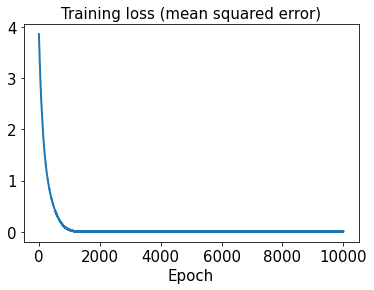

In [105]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

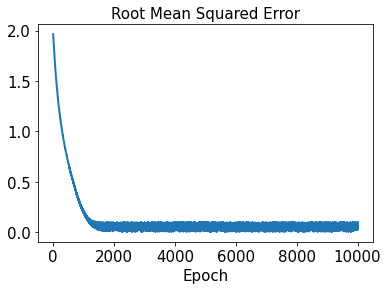

In [106]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [107]:
test_results3 = sd3.evaluate(x_test3)

1/1 [==============================] - 0s 67ms/step - loss: 7.3229e-06 - rmse: 0.0000e+00


In [108]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [109]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [110]:
decoded_train3 = sd3.predict(decoded_sensor_train3)

In [111]:
decoded_test3 = sd3.predict(decoded_sensor_test3)

In [112]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [113]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [114]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.09722157987589805


In [115]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.11179435615508111


In [116]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.07466979330671503, 0.1077078368820519, 0.04349572658333523, 0.06728939839177042, 0.002422717643816537, 0.09207452038287973, 0.03203168214640582, 0.11650774603670982, 0.017718574175455422, 0.17047801222640088, 0.15104283176250824, 0.11616288193569056, 0.0527864680107906, 0.1110947723758403, 0.076646828393215, 0.11660685358412594, 0.08736158549904936, 0.011750559909269579, 0.11635801496491892, 0.10128979783677478, 0.21399881679510688, 0.11538103533379668, 0.1914422093252106, 0.021674252317611515, 0.13307264830768686, 0.08489236861090403, 0.016275463905395932, 0.007264201186578927, 0.007554388079669439, 0.10343728185830305, 0.04503376687812116, 0.06316148073736322, 0.2382158383969771]


In [117]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.027983556954912947, 0.0567688389828806, 0.09824097760077796, 0.03524348847981984, 0.11363935820203777, 0.29191176635276417, 0.003845226603726817, 0.26416277482912137]


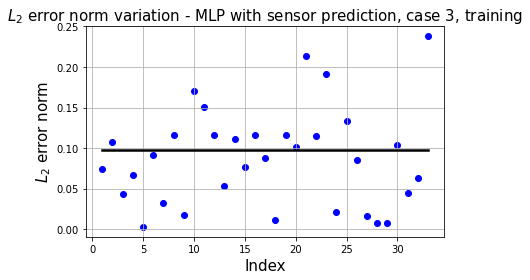

In [132]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

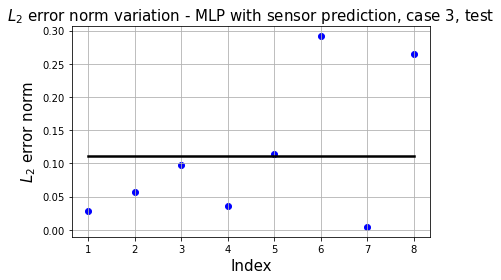

In [133]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

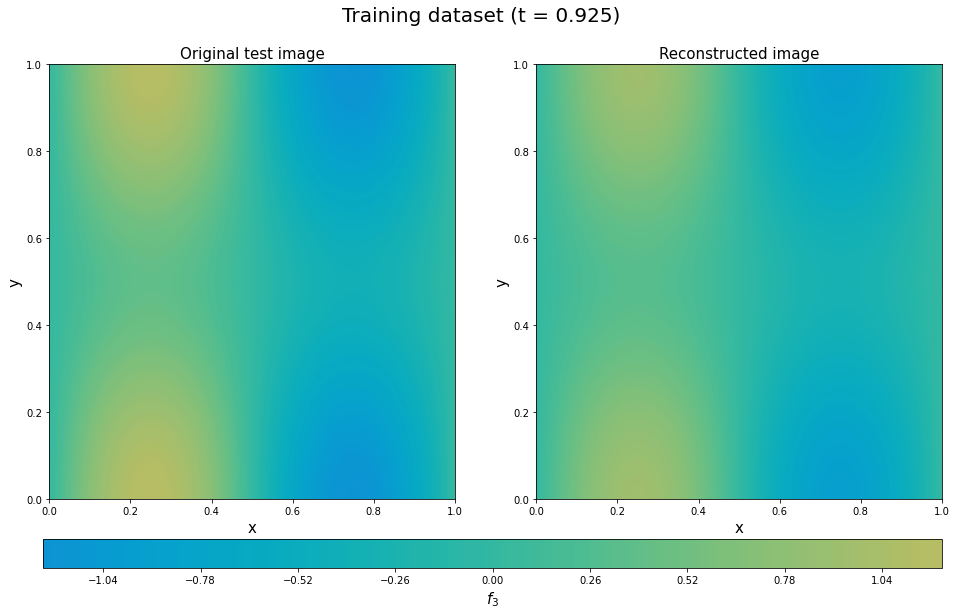

In [120]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

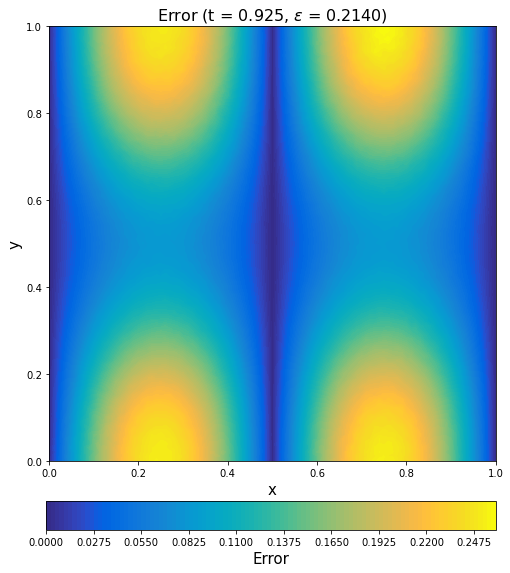

In [121]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

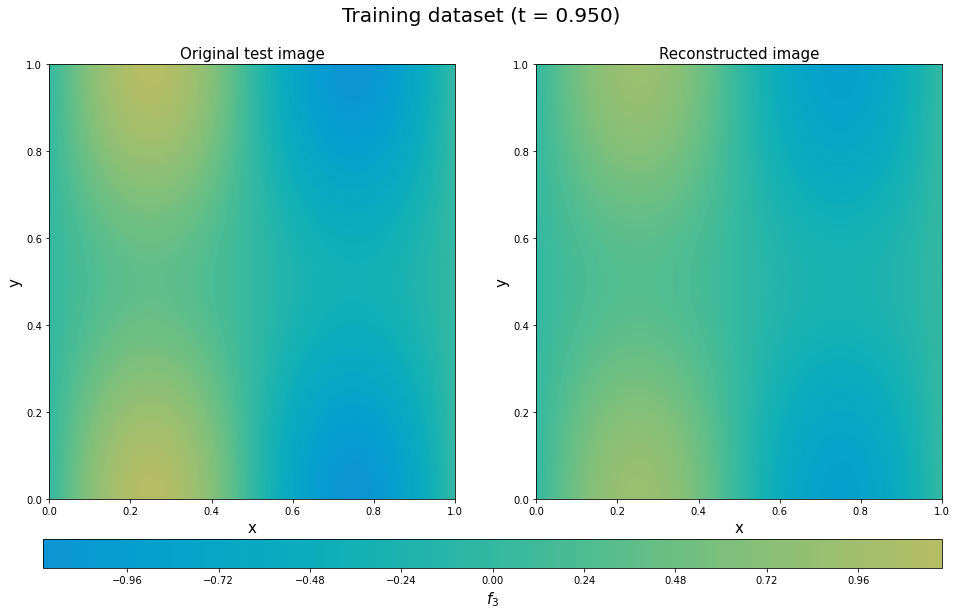

In [122]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

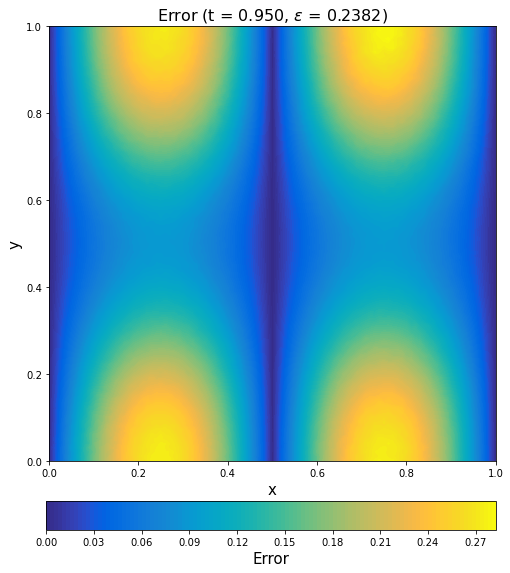

In [123]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

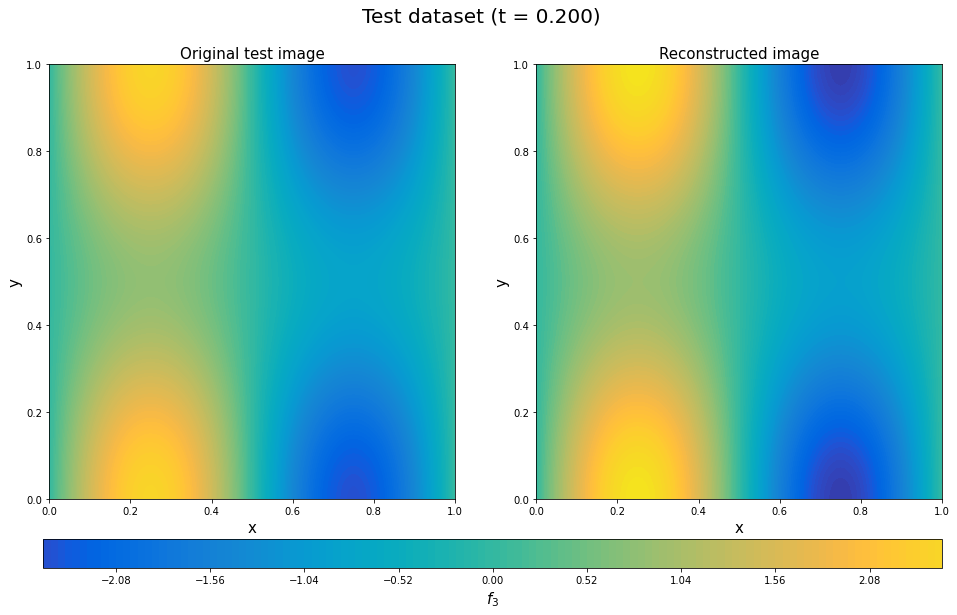

In [124]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

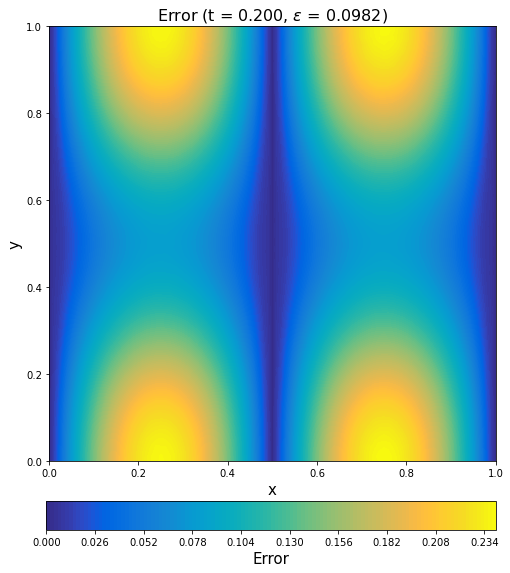

In [125]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

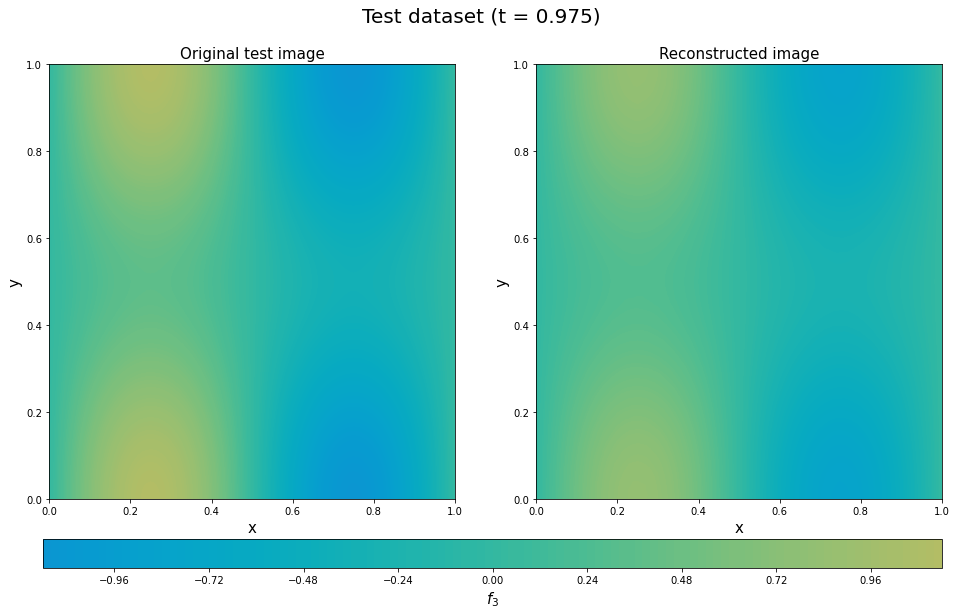

In [126]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

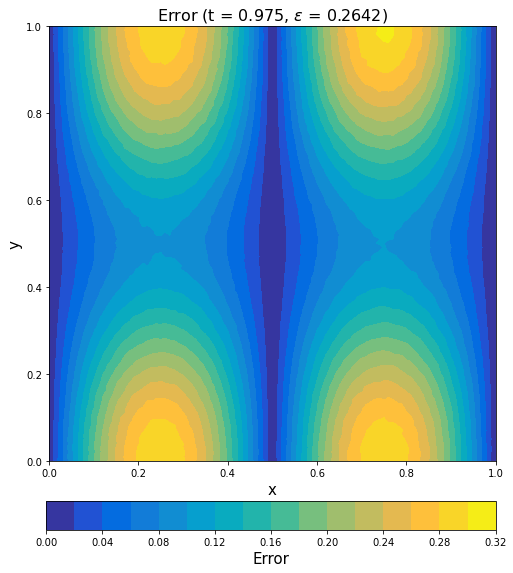

In [127]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [35]:
t_train_file = t_train.reshape((33, 1))
t_test_file = t_test.reshape((8, 1))
x_train_file = x_train1.reshape(33, 16)
x_test_file = x_test1.reshape((8, 16))
y_train_file = y_train1.reshape((33, 101*101))
y_test_file = y_test1.reshape((8, 101*101))

In [37]:
training_file = np.hstack((t_train_file, x_train_file))
test_file = np.hstack((t_test_file, x_test_file))

In [40]:
output_file = np.vstack((test_file, training_file))

In [41]:
output_file.shape

(41, 17)

In [42]:
np.savetxt('trainingAndTestData.txt', output_file)